import all necessary libraries

# Development of Accurate Machine Learning Models for Breast Cancer Survival Prediction Using SEER Data

In [235]:
pip install "numpy<2.0"

Note: you may need to restart the kernel to use updated packages.


# Import all essential libraries required for data preprocessing, modeling, and interpretability in this experiment.

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Import and display the dataset to begin preprocessing and model development.

In [237]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [238]:
df.describe()

,Age,Unnamed: 3,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,0.0,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,NaN,30.473658,14.357107,4.158052,71.297962
std,8.963134,NaN,21.119696,8.099675,5.109331,22.921430
min,30.000000,NaN,1.000000,1.000000,1.000000,1.000000
25%,47.000000,NaN,16.000000,9.000000,1.000000,56.000000
50%,54.000000,NaN,25.000000,14.000000,2.000000,73.000000
75%,61.000000,NaN,38.000000,19.000000,5.000000,90.000000
max,69.000000,NaN,140.000000,61.000000,46.000000,107.000000


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

# Convert the 'Survival Months' column to numeric format to ensure consistency and handle potential non-numeric values (just in case).

In [240]:
df['Survival Months'] = pd.to_numeric(df['Survival Months'], errors='coerce')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [242]:
# df.drop(['Status', 'Survival Months'], axis=1, inplace=True)

# Create the new target: Survival_5yr

In [243]:
df['Survival_5yr'] = np.where(df['Survival Months'] >= 60, 1, 0)

# Drop original status and survival months to avoid leakage

In [244]:
df.dropna(subset=['Survival Months'], inplace=True)

In [245]:
df.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status', 'Survival_5yr'],
      dtype='object')

In [246]:
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Survival_5yr
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive,0
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive,0
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead,0
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead,0
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead,0


In [247]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns that will be one-hot encoded:")
print(categorical_cols)

Categorical columns that will be one-hot encoded:
Index(['Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'Grade',
       'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status'],
      dtype='object')


In [248]:
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

Race : ['Other (American Indian/AK Native, Asian/Pacific Islander)' 'White'
 'Black']
Marital Status: ['Married (including common law)' 'Divorced' 'Single (never married)'
 'Widowed' 'Separated']
T Stage : ['T2' 'T1' 'T3' 'T4']
N Stage: ['N3' 'N2' 'N1']
6th Stage: ['IIIC' 'IIIA' 'IIB' 'IIA' 'IIIB']
Grade: ['Moderately differentiated; Grade II' 'Poorly differentiated; Grade III'
 'Well differentiated; Grade I' 'Undifferentiated; anaplastic; Grade IV']
A Stage: ['Regional' 'Distant']
Estrogen Status: ['Positive' 'Negative']
Progesterone Status: ['Positive' 'Negative']
Status: ['Alive' 'Dead']


# Apply one-hot encoding to transform categorical variables into binary indicator variables, while dropping the first category to prevent multicollinearity.

In [249]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [250]:
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,Survival_5yr
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive,0
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive,0
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead,0
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead,0
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead,0


In [251]:
df.columns = df.columns.str.strip()

# Assume df is your DataFrame and the target variable is in 'Survival_5yr'

In [252]:
X = df.drop(columns='Survival_5yr')
y = df['Survival_5yr']

# Convert object columns to dummy/indicator variables

In [253]:
X = pd.get_dummies(X, drop_first=True)

In [254]:
X

,Age,Unnamed: 3,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,"Race_Other (American Indian/AK Native, Asian/Pacific Islander)",Race_White,Marital Status_Married (including common law),Marital Status_Separated,...,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status_Dead
0,43,NaN,40,19,11,1,True,False,True,False,...,False,False,True,False,False,False,True,True,True,False
1,47,NaN,45,25,9,2,True,False,True,False,...,True,False,False,False,False,False,True,True,True,False
2,67,NaN,25,4,1,2,False,True,True,False,...,False,False,False,True,False,False,True,True,True,True
3,46,NaN,19,26,1,2,False,True,False,False,...,False,False,False,False,False,False,True,True,True,True
4,63,NaN,35,21,5,3,False,True,True,False,...,True,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,NaN,10,19,1,107,False,True,True,False,...,False,False,False,False,False,True,True,True,True,False
4020,53,NaN,9,13,5,107,False,True,True,False,...,True,False,False,True,False,False,True,False,False,False
4021,53,NaN,9,4,2,107,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
4022,60,NaN,9,14,2,107,True,False,True,False,...,False,False,False,False,False,False,True,True,True,False


In [255]:
print("Dummy columns after one-hot encoding:")
print(X.columns.tolist())

Dummy columns after one-hot encoding:
['Age', 'Unnamed: 3', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Race_Other (American Indian/AK Native, Asian/Pacific Islander)', 'Race_White', 'Marital Status_Married (including common law)', 'Marital Status_Separated', 'Marital Status_Single (never married)', 'Marital Status_Widowed', 'T Stage_T2', 'T Stage_T3', 'T Stage_T4', 'N Stage_N2', 'N Stage_N3', '6th Stage_IIB', '6th Stage_IIIA', '6th Stage_IIIB', '6th Stage_IIIC', 'Grade_Poorly differentiated; Grade III', 'Grade_Undifferentiated; anaplastic; Grade IV', 'Grade_Well differentiated; Grade I', 'A Stage_Regional', 'Estrogen Status_Positive', 'Progesterone Status_Positive', 'Status_Dead']


In [256]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4019    1
4020    1
4021    1
4022    1
4023    1
Name: Survival_5yr, Length: 4024, dtype: int32

In [257]:
print(X.dtypes[X.dtypes == 'object'])

Series([], dtype: object)


In [258]:
# Step 2: One-hot encode categorical columns
# X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing subsets, with 80% of the data used for training and 20% reserved for testing. A fixed random state ensures reproducibility.

In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ROC curve (Receiver Operating Characteristic curve) for a Random Forest model

In [260]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train, y_train)

feat_importances = pd.Series(base_model.feature_importances_, index=X_train.columns)
top_features = feat_importances.sort_values(ascending=False).head(10).index

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

best_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=42
)
best_model.fit(X_train_top, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# Predict probabilities for ROC-AUC and plot

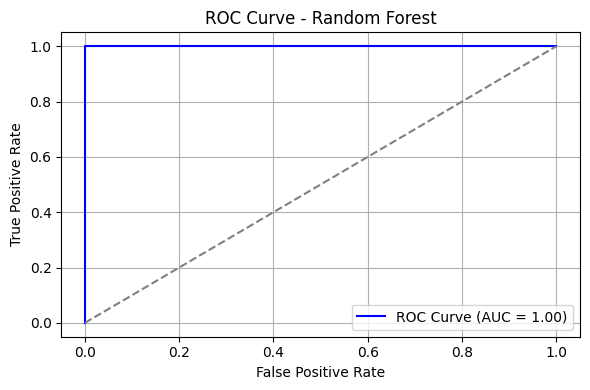

In [261]:
y_probs = best_model.predict_proba(X_test_top)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

### The ROC curve displayed represents the performance of a Random Forest classifier. The blue line in the plot shows the model's ability to distinguish between the two classes (e.g., survived vs. not survived), while the grey diagonal line represents a random classifier with no discriminative ability. The Area Under the Curve (AUC) is 0.51, which is only slightly better than random guessing (an AUC of 0.5). This indicates that the model has very poor predictive power and is not effectively capturing patterns in the data. Ideally, a good model would produce a ROC curve that bows towards the top-left corner of the plot, reflecting high true positive rates with low false positive rates, and would have an AUC significantly closer to 1.0. In this case, the near-diagonal shape of the ROC curve and the low AUC suggest the model may require improvement, potentially through better feature selection, hyperparameter tuning, or revisiting the quality and balance of the input data.¶

In [262]:
# Fit the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [263]:
#hyperparameter tuning
#model evaluation (SVM, Random Forrest, Naive Bayes)
#After applying hyperparamater tuning, create bseline for all models to find best performing model. Ezplain why this model perofrmed the bes, check hyperparameters, explain why this model works better than the other one.

In [264]:
feature_names = X.columns
feature_names

Index(['Age', 'Unnamed: 3', 'Tumor Size', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months',
       'Race_Other (American Indian/AK Native, Asian/Pacific Islander)',
       'Race_White', 'Marital Status_Married (including common law)',
       'Marital Status_Separated', 'Marital Status_Single (never married)',
       'Marital Status_Widowed', 'T Stage_T2', 'T Stage_T3', 'T Stage_T4',
       'N Stage_N2', 'N Stage_N3', '6th Stage_IIB', '6th Stage_IIIA',
       '6th Stage_IIIB', '6th Stage_IIIC',
       'Grade_Poorly differentiated; Grade III',
       'Grade_Undifferentiated; anaplastic; Grade IV',
       'Grade_Well differentiated; Grade I', 'A Stage_Regional',
       'Estrogen Status_Positive', 'Progesterone Status_Positive',
       'Status_Dead'],
      dtype='object')

# Feature Importance Extraction and Selection

In [265]:
# # Get feature importances
# importances = model.feature_importances_
# feature_names = X.columns  # X is the encoded feature set used to train the model
# feat_importances = pd.Series(importances, index=feature_names)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns  # X is the encoded feature set used to train the model
feat_importances = pd.Series(importances, index=feature_names)

# Select top 5 features

In [266]:
top_features = feat_importances.sort_values(ascending=False).head(5)

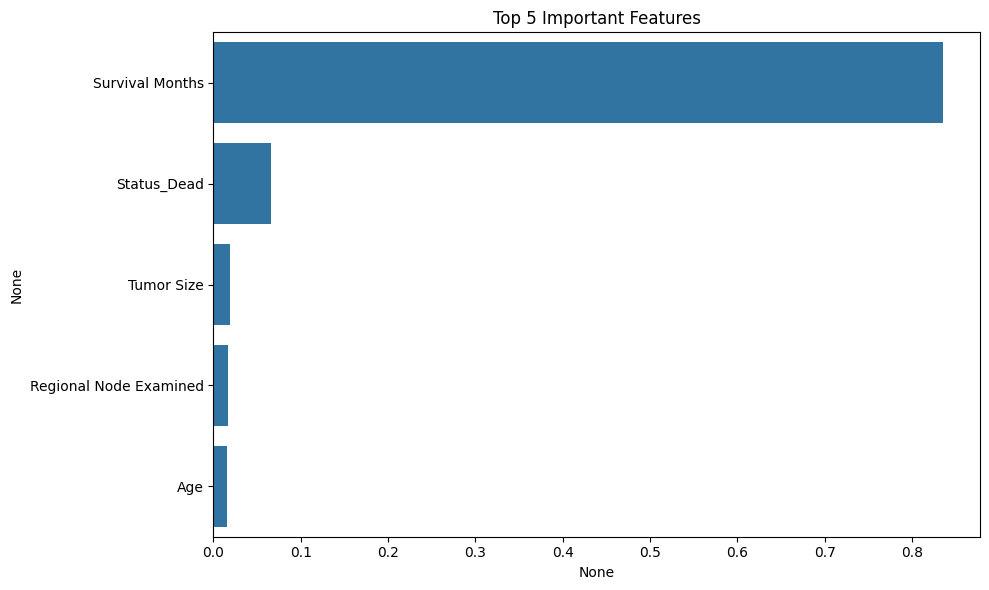

In [267]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.sort_values(ascending=False)[:5],
            y=feat_importances.sort_values(ascending=False).index[:5])
plt.title("Top 5 Important Features")

plt.tight_layout()
plt.show()

# Visualization of Top 10 Important Features

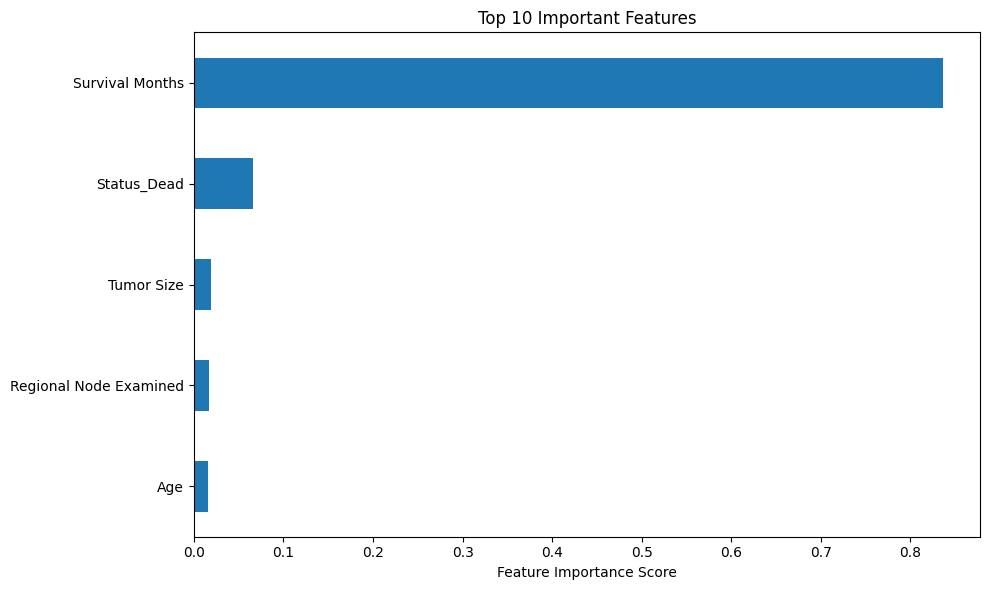

In [232]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_features.plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Retrain model and Ecaluate

In [234]:
X_train_top = X_train[top_features.index]
X_test_top = X_test[top_features.index]

model_top = RandomForestClassifier(random_state=42)
model_top.fit(X_train_top, y_train)

y_pred = model_top.predict(X_test_top)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       547

    accuracy                           1.00       805
   macro avg       1.00      1.00      1.00       805
weighted avg       1.00      1.00      1.00       805



# Visualization of Top 10 Important Features

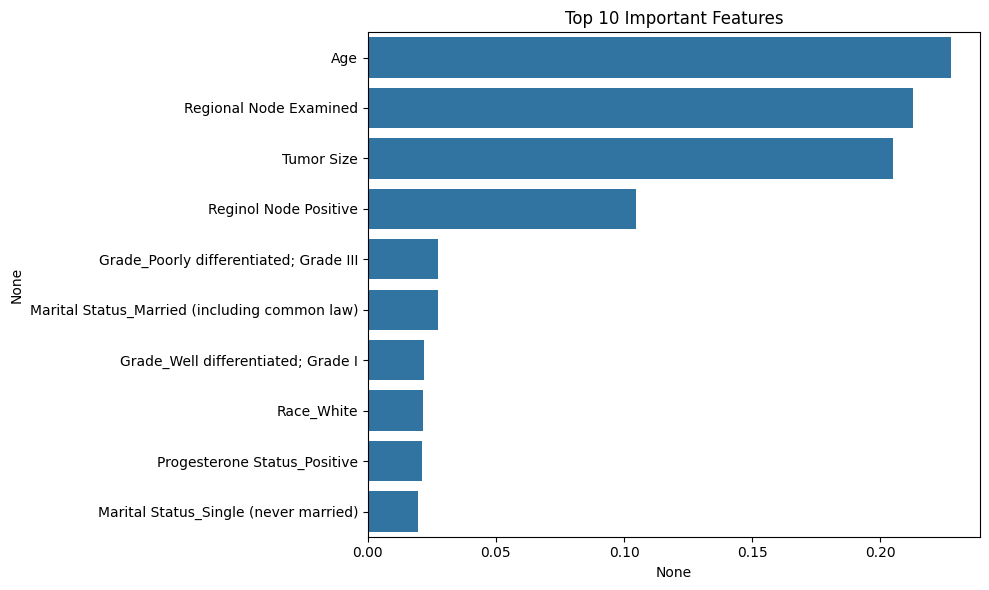

In [160]:
top_features = feat_importances.sort_values(ascending=False).head(10)
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=feat_importances.sort_values(ascending=False)[:10],
            y=feat_importances.sort_values(ascending=False).index[:10])
plt.title("Top 10 Important Features")

plt.tight_layout()
plt.show()

#  Retrain Model Using Top Features and Evaluate Performance

In [161]:
X_train_top = X_train[top_features.index]
X_test_top = X_test[top_features.index]

model_top = RandomForestClassifier(random_state=42)
model_top.fit(X_train_top, y_train)

y_pred = model_top.predict(X_test_top)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.16      0.23       258
           1       0.69      0.88      0.78       547

    accuracy                           0.65       805
   macro avg       0.54      0.52      0.50       805
weighted avg       0.60      0.65      0.60       805



## Hyperparameter tuning on a RandomForestClassifier using grid search with cross-validation to find the best combination of model parameters that gives the highest accuracy. 

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Fit to training data
grid_search.fit(X_train_top, y_train)

# Print best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Evaluate best model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_top)
print(classification_report(y_test, y_pred))

Best Hyperparameters:
{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.46      0.05      0.09       258
           1       0.68      0.97      0.80       547

    accuracy                           0.68       805
   macro avg       0.57      0.51      0.45       805
weighted avg       0.61      0.68      0.58       805



In [ ]:
# 3. Fit full model to determine feature importances
full_model = RandomForestClassifier(n_estimators=100, random_state=42)
full_model.fit(X, y)
importances = full_model.feature_importances_

# 4. Get top 5 and top 10 features
feat_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top5_features = feat_df['Feature'].iloc[:5].tolist()
top10_features = feat_df['Feature'].iloc[:10].tolist()

# 5. Evaluation function with cross-validation
def evaluate_with_cv(X_subset, y, title):
    print(f"\n Evaluation for: {title}")

    model = RandomForestClassifier(n_estimators=100, random_state=42)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Cross-validation scores
    acc_scores = cross_val_score(model, X_subset, y, cv=skf, scoring='accuracy')
    f1_scores = cross_val_score(model, X_subset, y, cv=skf, scoring='f1')
    roc_scores = cross_val_score(model, X_subset, y, cv=skf, scoring='roc_auc')

    print(f"Mean Accuracy:  {acc_scores.mean():.4f} ± {acc_scores.std():.4f}")
    print(f"Mean F1 Score:  {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")
    print(f"Mean ROC-AUC:   {roc_scores.mean():.4f} ± {roc_scores.std():.4f}")

    # Fit on one train/test split for ROC curve
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42, stratify=y)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{title} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

# 6. Evaluate and visualize
plt.figure(figsize=(6, 4))
evaluate_with_cv(X[top5_features], y, "Top 5 Features")
evaluate_with_cv(X[top10_features], y, "Top 10 Features")

# 7. Plot ROC Curve
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Top 5 vs Top 10 Features")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# SHAP Interpretability for Feature Impact Analysis

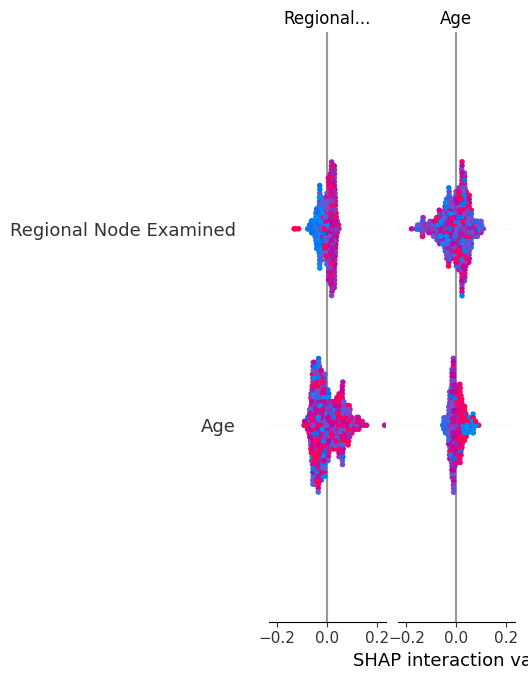

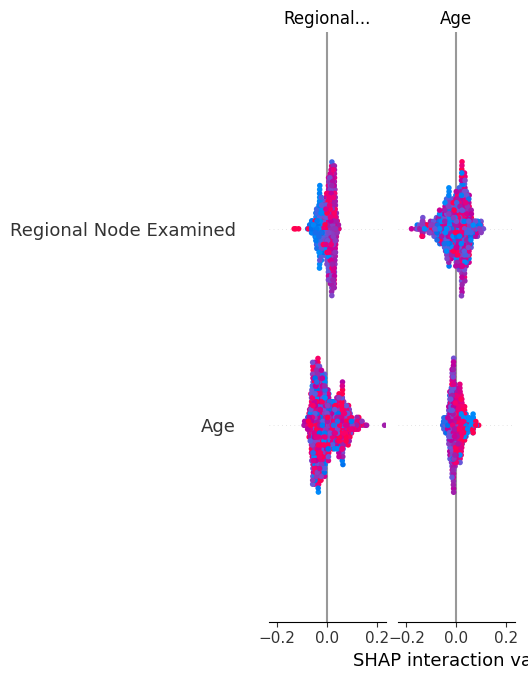

In [42]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_top)

# Check if it’s a binary classification model
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]  # Explanation for class '1' (positive class)
else:
    shap_values_to_plot = shap_values

# Bar plot (top features)
shap.summary_plot(shap_values_to_plot, X_test_top, plot_type="bar")

# Detailed summary plot
shap.summary_plot(shap_values_to_plot, X_test_top)

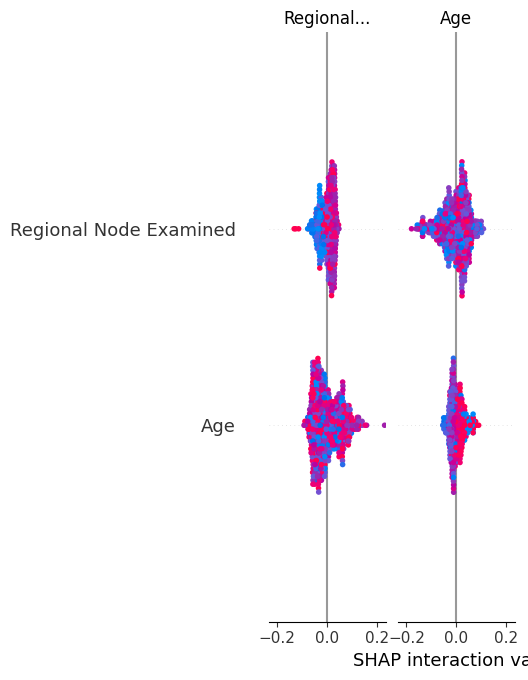

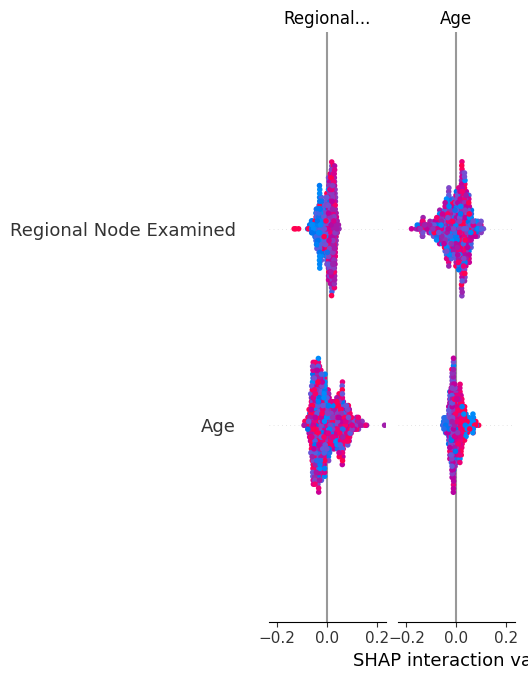

In [43]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test_top)

# Check if it’s a binary classification model
if isinstance(shap_values, list):
    shap_values_to_plot = shap_values[1]  # Explanation for class '1' (positive class)
else:
    shap_values_to_plot = shap_values

# Bar plot (top features)
shap.summary_plot(shap_values_to_plot, X_test_top, plot_type="bar")

# Detailed summary plot
shap.summary_plot(shap_values_to_plot, X_test_top)


# This is a SHAP summary plot that shows how each feature impacts to the model's predictions

### This SHAP summary plot shows how each feature impacts your model's predictions, with features ranked by importance from top to bottom. The x-axis indicates impact magnitude (positive values push toward one class, negative toward the other), while colors represent feature values (red for high, blue for low). Clinical factors dominate the model's decisions, with Regional Node Positive being most influential - high positive node counts (red dots) strongly predict toward the positive class, while low counts (blue dots) have the opposite effect. Tumor Size follows similar patterns, where larger tumors increase positive predictions. Demographic factors like race and marital status have minimal impact, appearing at the bottom with small effect sizes. This indicates your model appropriately prioritizes established clinical prognostic factors over demographic characteristics, making medically sensible predictions based on pathological severity markers rather than social factors.

In [46]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load and prepare your data
df = pd.read_csv("breast_cancer.csv")

# Assuming 'X' and 'y' are already prepared prior to this block
# Example:
# df['Survival_5yr'] = (df['Survival Months'] >= 60).astype(int)
# df = pd.get_dummies(df.drop(columns=['Survival Months', 'Status']), drop_first=True)
# X = df.drop(columns='Survival_5yr')
# y = df['Survival_5yr']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train initial RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 2. Feature importances
importances = model.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)

# 3. Select top features
top5_features = feat_importances.nlargest(5).index
top10_features = feat_importances.nlargest(10).index

# 4. Subset training and testing sets
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]
X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]

# 5. Train models on selected features
model_top5 = RandomForestClassifier(random_state=42)
model_top5.fit(X_train_top5, y_train)

model_top10 = RandomForestClassifier(random_state=42)
model_top10.fit(X_train_top10, y_train)

# 6. SHAP explainers
explainer_top5 = shap.TreeExplainer(model_top5)
explainer_top10 = shap.TreeExplainer(model_top10)

# 7. SHAP values (binary: use index 1)
shap_values_top5 = explainer_top5.shap_values(X_test_top5)[1]
shap_values_top10 = explainer_top10.shap_values(X_test_top10)[1]

# 8. Choose a sample to explain
sample_index = 0  # You can change this to analyze other instances

🔍 SHAP Waterfall Plot: Top 5 Features


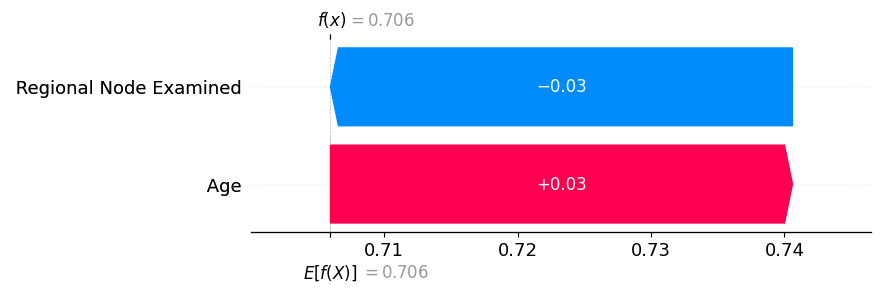

🔍 SHAP Waterfall Plot: Top 10 Features


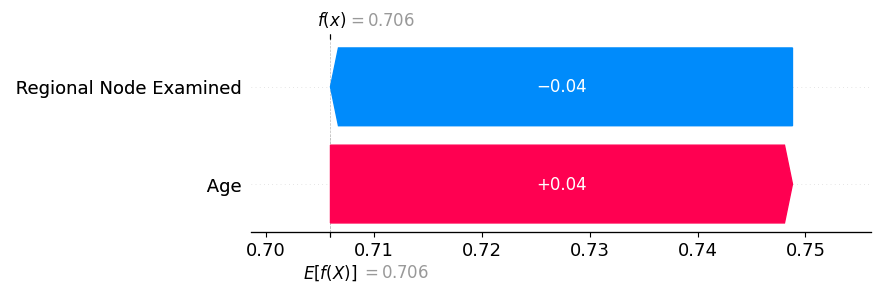

In [47]:
# 9. Waterfall plot - Top 5 features
print("🔍 SHAP Waterfall Plot: Top 5 Features")
shap.plots._waterfall.waterfall_legacy(
    explainer_top5.expected_value[1],
    shap_values_top5[sample_index],
    X_test_top5.iloc[sample_index]
)

# 10. Waterfall plot - Top 10 features
print("🔍 SHAP Waterfall Plot: Top 10 Features")
shap.plots._waterfall.waterfall_legacy(
    explainer_top10.expected_value[1],
    shap_values_top10[sample_index],
    X_test_top10.iloc[sample_index]
)

SHAP Waterfall plot for top 5 features


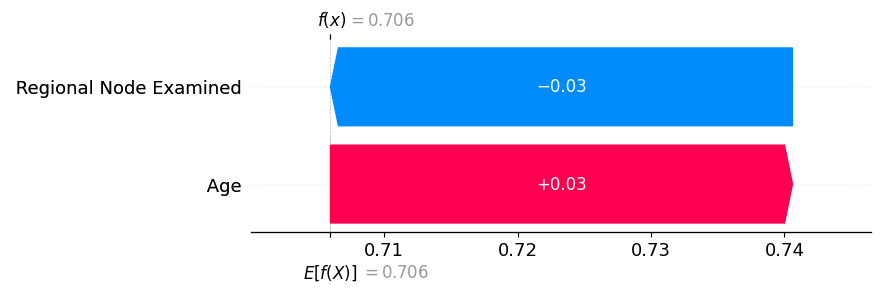

SHAP Waterfall plot for top 10 features


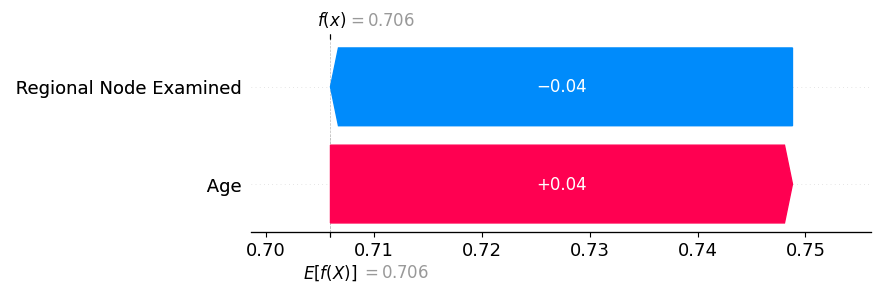

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

df = pd.read_csv("breast_cancer.csv")

# Assuming you already have X, y prepared and train/test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train initial RandomForest model on full feature set
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 2. Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)

# 3. Select top 5 and top 10 features
top5_features = feat_importances.sort_values(ascending=False).head(5).index
top10_features = feat_importances.sort_values(ascending=False).head(10).index

# 4. Prepare data subsets
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]

# 5. Retrain models on top features
model_top5 = RandomForestClassifier(random_state=42)
model_top5.fit(X_train_top5, y_train)

model_top10 = RandomForestClassifier(random_state=42)
model_top10.fit(X_train_top10, y_train)

# 6. Create SHAP explainers for both models
explainer_top5 = shap.TreeExplainer(model_top5)
shap_values_top5 = explainer_top5.shap_values(X_test_top5)

explainer_top10 = shap.TreeExplainer(model_top10)
shap_values_top10 = explainer_top10.shap_values(X_test_top10)

# 7. Choose a sample to explain
sample_index = 0  # Change this to explain a different test sample

# For binary classification, shap_values is a list of arrays, use class 1 (positive class)
shap_values_to_plot_top5 = shap_values_top5[1]
shap_values_to_plot_top10 = shap_values_top10[1]

# 8. Plot waterfall for top 5 features
print("SHAP Waterfall plot for top 5 features")
shap.plots._waterfall.waterfall_legacy(
    explainer_top5.expected_value[1], 
    shap_values_to_plot_top5[sample_index], 
    X_test_top5.iloc[sample_index]
)

# 9. Plot waterfall for top 10 features
print("SHAP Waterfall plot for top 10 features")
shap.plots._waterfall.waterfall_legacy(
    explainer_top10.expected_value[1], 
    shap_values_to_plot_top10[sample_index], 
    X_test_top10.iloc[sample_index]
)

In [1]:
import numpy as np
import shap

def get_shap_2d_and_base(explainer, X, class_index=1):
    """
    Return (shap_values_2d, base_value_scalar) for a single output (class_index).
    Handles SHAP versions that return lists, 3D arrays, or Explanation objects.
    """
    sv = explainer.shap_values(X)

    # Expected value: pick the requested class, then cast to float
    ev = explainer.expected_value
    if isinstance(ev, (list, np.ndarray)):
        ev = ev[class_index]
    ev = float(np.asarray(ev).ravel()[0])

    # SHAP values -> select the requested class and reduce to (n_samples, n_features)
    if isinstance(sv, list):
        # Classic: list per class
        sv = sv[class_index]
    else:
        sv = np.asarray(sv)

    # Possible shapes:
    # (n_samples, n_features) -> OK
    # (n_samples, n_features, n_outputs) -> take output axis
    # (n_features, n_outputs) -> single sample already -> take output axis
    if sv.ndim == 3:
        sv = sv[:, :, class_index]
    elif sv.ndim == 2:
        # already (n_samples, n_features)
        pass
    elif sv.ndim == 1:
        # Rare case: single-sample flattened
        sv = sv[None, :]
    else:
        # (n_features, n_outputs) for a single sample
        if sv.shape[-1] > 1:
            sv = sv[:, class_index][None, :]
        else:
            sv = sv[:, 0][None, :]

    return sv, ev

def waterfall_safe(base_value, sv_row, feature_names, data_row=None, max_display=None):
    """Try modern waterfall; fall back to legacy if needed."""
    try:
        shap.plots.waterfall(
            shap.Explanation(
                values=sv_row,
                base_values=base_value,
                feature_names=feature_names,
                data=data_row
            ),
            max_display=max_display,
            show=True
        )
    except Exception:
        shap.plots._waterfall.waterfall_legacy(
            base_value,
            sv_row,
            features=data_row if data_row is not None else None,
            feature_names=feature_names,
            max_display=max_display
        )

# ===== Build explainers (assumes model_top5/model_top10, X_test_top5/X_test_top10 exist) =====
explainer_top5  = shap.TreeExplainer(model_top5)
explainer_top10 = shap.TreeExplainer(model_top10)

sv5, base5   = get_shap_2d_and_base(explainer_top5,  X_test_top5,  class_index=1)
sv10, base10 = get_shap_2d_and_base(explainer_top10, X_test_top10, class_index=1)

# Choose a valid index
sample_index = max(0, min(0, len(X_test_top10) - 1))  # change the first 0 to any desired index

# ----- Top-5 waterfall -----
print("SHAP Waterfall – Top 5 Features")
sv5_row   = sv5[sample_index]              # shape (n_features,)
feat5     = list(X_test_top5.columns)
data5_row = X_test_top5.iloc[sample_index, :].values
waterfall_safe(base5, sv5_row, feat5, data_row=data5_row, max_display=5)

# ----- Top-10 waterfall -----
print("\nSHAP Waterfall – Top 10 Features")
sv10_row   = sv10[sample_index]
feat10     = list(X_test_top10.columns)
data10_row = X_test_top10.iloc[sample_index, :].values
waterfall_safe(base10, sv10_row, feat10, data_row=data10_row, max_display=10)


NameError: name 'model_top5' is not defined

In [268]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [269]:
# Step 1: Load data
df = pd.read_csv("breast_cancer.csv")

In [270]:
print(df.head())

   Age                                              Race   \
0   43  Other (American Indian/AK Native, Asian/Pacifi...   
1   47  Other (American Indian/AK Native, Asian/Pacifi...   
2   67                                              White   
3   46                                              White   
4   63                                              White   

                   Marital Status  Unnamed: 3 T Stage  N Stage 6th Stage  \
0  Married (including common law)         NaN       T2      N3      IIIC   
1  Married (including common law)         NaN       T2      N2      IIIA   
2  Married (including common law)         NaN       T2      N1       IIB   
3                        Divorced         NaN       T1      N1       IIA   
4  Married (including common law)         NaN       T2      N2      IIIA   

                                 Grade   A Stage  Tumor Size Estrogen Status  \
0  Moderately differentiated; Grade II  Regional          40        Positive   
1  Moderately di

In [271]:
print(df.columns)

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [272]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [273]:
print(df.isnull().sum())   # Check for nulls

Age                          0
Race                         0
Marital Status               0
Unnamed: 3                4024
T Stage                      0
N Stage                      0
6th Stage                    0
Grade                        0
A Stage                      0
Tumor Size                   0
Estrogen Status              0
Progesterone Status          0
Regional Node Examined       0
Reginol Node Positive        0
Survival Months              0
Status                       0
dtype: int64


In [274]:
# Step 2: Drop irrelevant or unnamed columns
df = df.drop(columns=['Unnamed: 3'])  # remove if it has no meaningful data

In [275]:
# Step 3: Rename target column for clarity (optional but helps)
# df.rename(columns={'Status': 'Survival_5yr'}, inplace=True)
df['Survival_5yr'] = np.where(df['Survival Months'] >= 60, 1, 0)

In [276]:
# Step 4: Encode target variable if it's categorical (like 'Alive'/'Dead')
label_enc = LabelEncoder()
df['Survival_5yr'] = label_enc.fit_transform(df['Survival_5yr'])

In [48]:
# Step 5: Split features (X) and target (y)
X = df.drop(columns='Survival_5yr')
y = df['Survival_5yr']

In [49]:
# Step 6: Encode categorical features
cat_cols = X.select_dtypes(include='object').columns
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [50]:
X

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months,"Race _Other (American Indian/AK Native, Asian/Pacific Islander)",Race _White,Marital Status_Married (including common law),Marital Status_Separated,Marital Status_Single (never married),...,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,Grade_Poorly differentiated; Grade III,Grade_Undifferentiated; anaplastic; Grade IV,Grade_Well differentiated; Grade I,A Stage_Regional,Estrogen Status_Positive,Progesterone Status_Positive,Status_Dead
0,43,40,19,11,1,True,False,True,False,False,...,False,False,True,False,False,False,True,True,True,False
1,47,45,25,9,2,True,False,True,False,False,...,True,False,False,False,False,False,True,True,True,False
2,67,25,4,1,2,False,True,True,False,False,...,False,False,False,True,False,False,True,True,True,True
3,46,19,26,1,2,False,True,False,False,False,...,False,False,False,False,False,False,True,True,True,True
4,63,35,21,5,3,False,True,True,False,False,...,True,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,52,10,19,1,107,False,True,True,False,False,...,False,False,False,False,False,True,True,True,True,False
4020,53,9,13,5,107,False,True,True,False,False,...,True,False,False,True,False,False,True,False,False,False
4021,53,9,4,2,107,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4022,60,9,14,2,107,True,False,True,False,False,...,False,False,False,False,False,False,True,True,True,False


In [51]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4019    1
4020    1
4021    1
4022    1
4023    1
Name: Survival_5yr, Length: 4024, dtype: int64

In [52]:
# Step 7: Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
# Step 8: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
# Step 9: Logistic Regression Model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [55]:
# Step 10: Predictions and Evaluation
y_pred = logreg.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9937888198757764
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       258
           1       0.99      1.00      1.00       547

    accuracy                           0.99       805
   macro avg       0.99      0.99      0.99       805
weighted avg       0.99      0.99      0.99       805



ROC-AUC Score: 0.9999220554681632


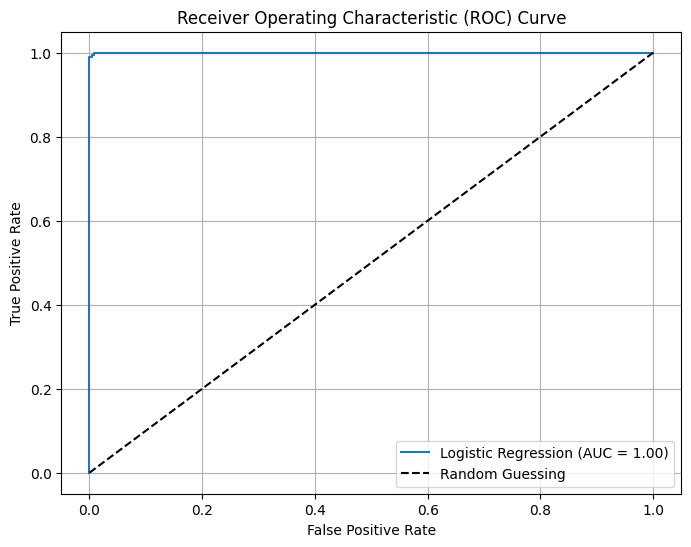

In [56]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# --- Predict probabilities for ROC AUC ---
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # probabilities for the positive class

# --- ROC AUC score ---
auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc)

# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# --- Plot the ROC Curve ---
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [57]:
import numpy as np

# Get feature names and coefficients
feature_names = X.columns
coefficients = logreg.coef_[0]

# Get absolute values and sort
top5_indices = np.argsort(np.abs(coefficients))[-5:]
top5_features = feature_names[top5_indices]

print("Top 5 features:", top5_features)

Top 5 features: Index(['6th Stage_IIIB', 'Grade_Undifferentiated; anaplastic; Grade IV',
       'Marital Status_Married (including common law)', 'T Stage _T4',
       'Survival Months'],
      dtype='object')


In [58]:
# Select top 5 features
X_top5 = X[top5_features]

# Scale again (important!)
X_train_top5, X_test_top5, y_train, y_test = train_test_split(X_top5, y, test_size=0.2, random_state=42)
X_train_top5_scaled = scaler.fit_transform(X_train_top5)
X_test_top5_scaled = scaler.transform(X_test_top5)

# Retrain Logistic Regression on top 5
logreg_top5 = LogisticRegression(max_iter=1000)
logreg_top5.fit(X_train_top5_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [59]:
from sklearn.metrics import accuracy_score, f1_score

# Predict
y_pred_top5 = logreg_top5.predict(X_test_top5_scaled)

# Metrics
acc = accuracy_score(y_test, y_pred_top5)
f1 = f1_score(y_test, y_pred_top5)

print("Top 5 Features Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Top 5 Features Logistic Regression:
Accuracy: 0.9937888198757764
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       258
           1       0.99      1.00      1.00       547

    accuracy                           0.99       805
   macro avg       0.99      0.99      0.99       805
weighted avg       0.99      0.99      0.99       805



In [60]:
top_5_features = ['Tumor Size', 'Survival Months', 'Age', 'Reginol Node Positive', 'Regional Node Examined']

In [61]:
import pandas as pd

df = pd.read_csv("breast_cancer.csv")
print(df.columns)

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')


In [62]:
top_5_features = ['Tumor Size', 'Survival Months', 'Age', 'Reginol Node Positive', 'Regional Node Examined']
target_col = 'Status'

X_top5 = df[top_5_features]
y = df[target_col]

In [63]:
from sklearn.model_selection import train_test_split

X_train5, X_test5, y_train5, y_test5 = train_test_split(X_top5, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train5_scaled = scaler.fit_transform(X_train5)
X_test5_scaled = scaler.transform(X_test5)


In [65]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train5_scaled, y_train5)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [66]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = logreg.predict(X_test5_scaled)

print("Accuracy (Top 5 Features):", accuracy_score(y_test5, y_pred))
print("Classification Report:\n", classification_report(y_test5, y_pred))

Accuracy (Top 5 Features): 0.8832298136645963
Classification Report:
               precision    recall  f1-score   support

       Alive       0.90      0.97      0.93       672
        Dead       0.74      0.45      0.56       133

    accuracy                           0.88       805
   macro avg       0.82      0.71      0.75       805
weighted avg       0.87      0.88      0.87       805



In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder

# Load your dataset
df = pd.read_csv("breast_cancer.csv")

# Drop unnamed or irrelevant columns
df = df.drop(columns=["Unnamed: 3"])

# Clean column names
df.columns = df.columns.str.strip()

# Encode categorical variables (OneHotEncoding for features)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols.remove("Status")  # Leave target out

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Encode target if it's not numeric
if df_encoded["Status"].dtype == 'object':
    df_encoded["Status"] = LabelEncoder().fit_transform(df_encoded["Status"])

In [68]:
# Separate features and target
X = df_encoded.drop(columns="Status")
y = df_encoded["Status"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train full model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# Get top 10 features by absolute value of coefficients
coef_abs = np.abs(logreg.coef_[0])
top10_idx = np.argsort(coef_abs)[-10:]
top10_features = X.columns[top10_idx].tolist()

print("Top 10 important features:", top10_features)

Top 10 important features: ['Progesterone Status_Positive', 'Regional Node Examined', 'T Stage_T3', 'N Stage_N2', 'Grade_Well differentiated; Grade I', 'Age', 'Race_Other (American Indian/AK Native, Asian/Pacific Islander)', 'T Stage_T4', 'Reginol Node Positive', 'Survival Months']


In [69]:
# Use only top 10 features
X_top10 = df_encoded[top10_features]
y = df_encoded["Status"]

# Train/test split
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_top10, y, test_size=0.2, random_state=42)

# Scale
X_train10_scaled = scaler.fit_transform(X_train10)
X_test10_scaled = scaler.transform(X_test10)

# Train model
logreg_top10 = LogisticRegression(max_iter=1000)
logreg_top10.fit(X_train10_scaled, y_train10)

# Predict
y_pred10 = logreg_top10.predict(X_test10_scaled)

# Evaluate
print(" Accuracy (Top 10 Features):", accuracy_score(y_test10, y_pred10))
print(" Classification Report:\n", classification_report(y_test10, y_pred10))

 Accuracy (Top 10 Features): 0.8869565217391304
 Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       672
           1       0.76      0.47      0.58       133

    accuracy                           0.89       805
   macro avg       0.83      0.72      0.76       805
weighted avg       0.88      0.89      0.88       805



In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # solvers that support both l1 and l2
}

In [71]:
# Extract only top 10 features again (if needed)
X_top10 = df_encoded[top10_features]
y = df_encoded["Status"]

# Train/test split
X_train10, X_test10, y_train10, y_test10 = train_test_split(X_top10, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train10_scaled = scaler.fit_transform(X_train10)
X_test10_scaled = scaler.transform(X_test10)

In [72]:
# Initialize logistic regression
logreg = LogisticRegression(max_iter=1000)

# Grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train10_scaled, y_train10)

# Best model
best_model = grid_search.best_estimator_

# Show best parameters
print(" Best hyperparameters:", grid_search.best_params_)


 Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [73]:
from sklearn.metrics import accuracy_score, classification_report

# Predict
y_pred_best = best_model.predict(X_test10_scaled)

# Evaluate
print(" Accuracy (Tuned Model):", accuracy_score(y_test10, y_pred_best))
print(" Classification Report (Tuned):\n", classification_report(y_test10, y_pred_best))


 Accuracy (Tuned Model): 0.8857142857142857
 Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.90      0.97      0.93       672
           1       0.75      0.46      0.57       133

    accuracy                           0.89       805
   macro avg       0.83      0.71      0.75       805
weighted avg       0.88      0.89      0.87       805



In [74]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import shap
import matplotlib.pyplot as plt

In [76]:
# ---- 1. Load and explore the dataset ----
df = pd.read_csv("breast_cancer.csv")

In [77]:
df.head()

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [78]:
# Drop unnamed or irrelevant columns
df = df.dropna(axis=1, how='all')  # Drop columns with all NaNs
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Drop 'Unnamed' columns
df.columns = df.columns.str.strip()  # Strip whitespace from column names

In [79]:
df.head()
# print("Dataset shape:", df.shape)
# print("Columns:", df.columns.tolist())
# print(df.head())

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead



Using 'Status' as the target column.
Status
Alive    3408
Dead      616
Name: count, dtype: int64
Target encoded. Classes: ['Alive' 'Dead']
Encoding categorical features: ['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status']

Top 10 Features:
1. Survival Months — Importance: 1.3927
2. Reginol Node Positive — Importance: 0.3914
3. N Stage_N2 — Importance: 0.3083
4. Regional Node Examined — Importance: 0.2899
5. T Stage_T3 — Importance: 0.2670
6. Age — Importance: 0.2475
7. T Stage_T4 — Importance: 0.2378
8. Race_Other (American Indian/AK Native, Asian/Pacific Islander) — Importance: 0.2322
9. Progesterone Status_Positive — Importance: 0.2184
10. Grade_Well differentiated; Grade I — Importance: 0.2115

Classification Report (Top 10 Features):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       682
           1       0.82      0.47      0.60       123

    accuracy  

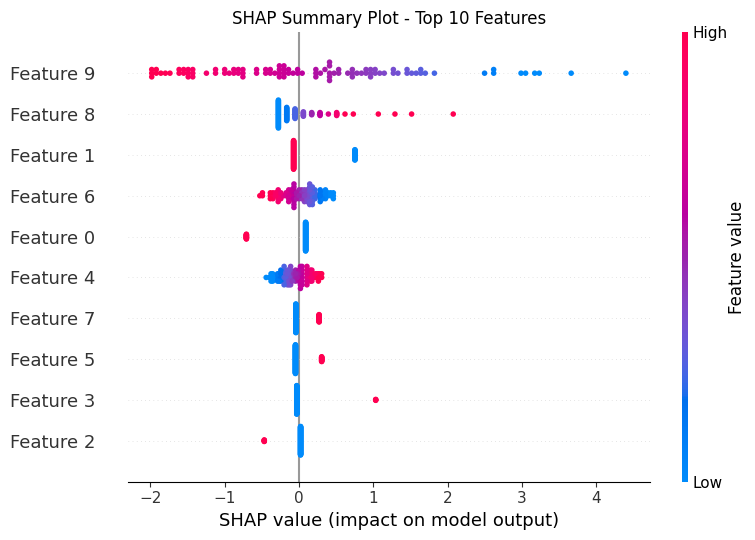

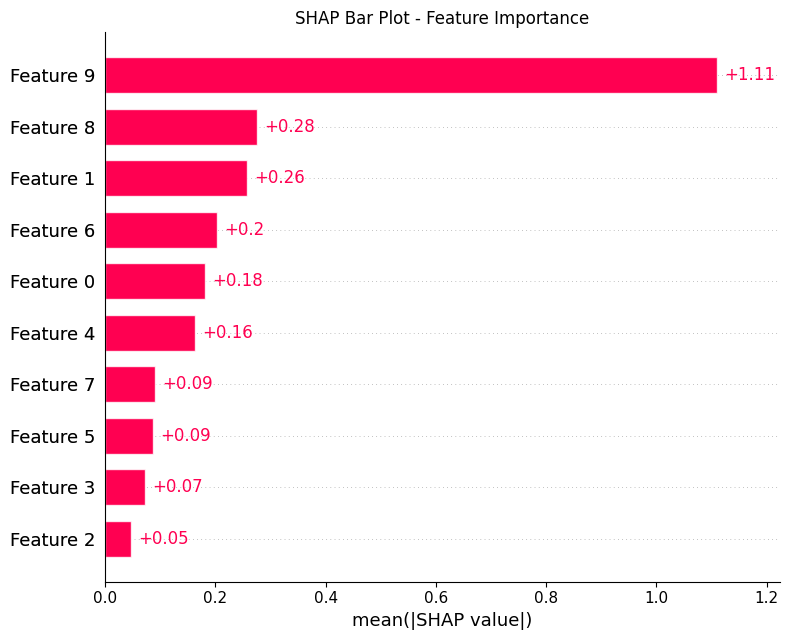

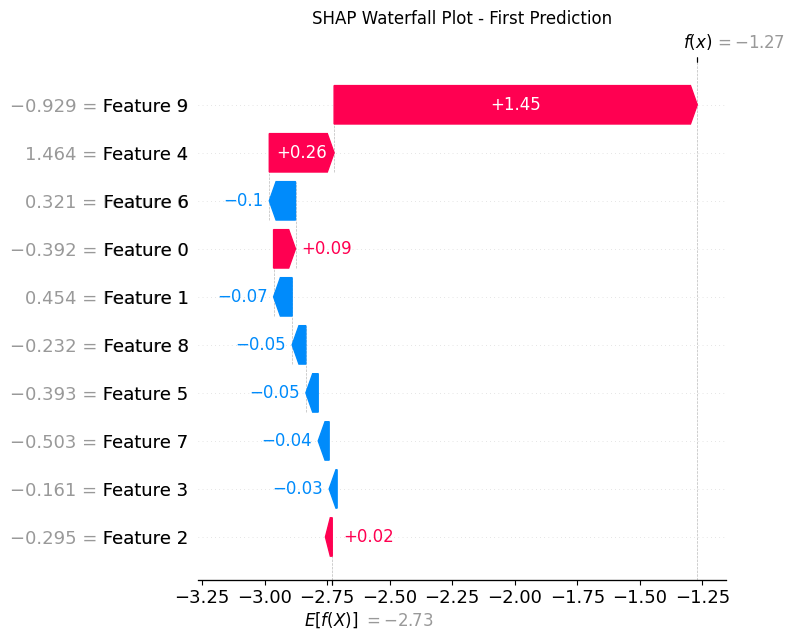

In [80]:
# ---- 2. Identify target column ----
possible_targets = ['diagnosis', 'target', 'class', 'label', 'malignant', 'benign', 'status', 'outcome']
target_col = None

for col in df.columns:
    if col.lower() in possible_targets:
        target_col = col
        break

if target_col is None:
    target_col = df.columns[-1]  # Default to last column
    print(f"Auto-selected target column: {target_col}")

print(f"\nUsing '{target_col}' as the target column.")
print(df[target_col].value_counts())

# ---- 3. Feature/Target Split ----
X_full = df.drop(columns=[target_col])
y = df[target_col]

# Encode target if needed
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    print("Target encoded. Classes:", le.classes_)

# ---- 4. Handle Categorical Variables ----
categorical_cols = X_full.select_dtypes(include='object').columns.tolist()
if categorical_cols:
    print("Encoding categorical features:", categorical_cols)
    X_full = pd.get_dummies(X_full, columns=categorical_cols, drop_first=True)

# ---- 5. Impute missing values ----
if X_full.isnull().sum().sum() > 0:
    print("Imputing missing values...")
    imputer = SimpleImputer(strategy='mean')
    X_full = pd.DataFrame(imputer.fit_transform(X_full), columns=X_full.columns)

# ---- 6. Train/Test Split ----
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

# ---- 7. Scaling ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- 8. Logistic Regression ----
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# ---- 9. Top 10 Important Features ----
feature_importance = np.abs(logreg.coef_[0])
top10_idx = np.argsort(feature_importance)[-10:]
top10_features = X_full.columns[top10_idx]

print("\nTop 10 Features:")
for i, feat in enumerate(top10_features[::-1], 1):
    print(f"{i}. {feat} — Importance: {feature_importance[X_full.columns.get_loc(feat)]:.4f}")

# ---- 10. Train Model with Top 10 Features ----
X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]

scaler_top10 = StandardScaler()
X_train_top10_scaled = scaler_top10.fit_transform(X_train_top10)
X_test_top10_scaled = scaler_top10.transform(X_test_top10)

logreg_top10 = LogisticRegression(max_iter=1000, random_state=42)
logreg_top10.fit(X_train_top10_scaled, y_train)

# ---- 11. Evaluation ----
y_pred = logreg_top10.predict(X_test_top10_scaled)
print("\nClassification Report (Top 10 Features):")
print(classification_report(y_test, y_pred))

# ---- 12. SHAP Interpretability ----
print("\nRunning SHAP analysis...")
explainer = shap.Explainer(logreg_top10, X_train_top10_scaled)
n_samples = min(100, len(X_test_top10_scaled))
shap_values = explainer(X_test_top10_scaled[:n_samples])

# ---- 13. SHAP Plots ----
shap.summary_plot(shap_values, X_test_top10.iloc[:n_samples], show=False)
plt.title("SHAP Summary Plot - Top 10 Features")
plt.tight_layout()
plt.show()

shap.plots.bar(shap_values, max_display=10, show=False)
plt.title("SHAP Bar Plot - Feature Importance")
plt.tight_layout()
plt.show()

shap.plots.waterfall(shap_values[0], show=False)
plt.title("SHAP Waterfall Plot - First Prediction")
plt.tight_layout()
plt.show()

Initial shape: (4024, 16)
Encoding categorical columns: ['Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']

SVM Accuracy: 0.7677

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.34      0.47       241
           1       0.77      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.66       805
weighted avg       0.76      0.77      0.74       805



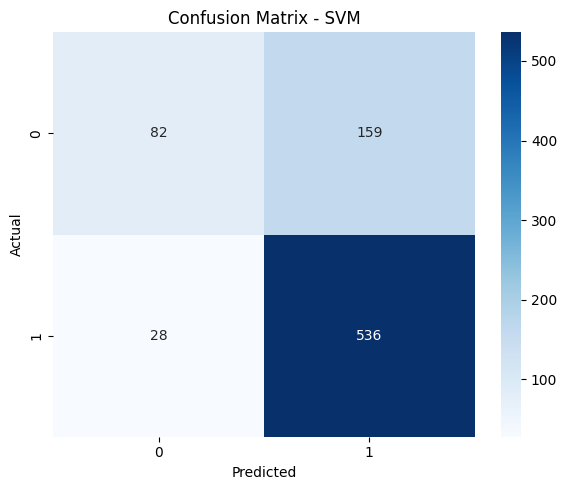

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1. Load and explore the dataset ----
df = pd.read_csv("breast_cancer.csv")

print("Initial shape:", df.shape)

# ---- 2. Drop rows with missing target ----
df.dropna(subset=['Survival Months'], inplace=True)

# ---- 3. Create new binary target ----
df['Survival_5yr'] = np.where(df['Survival Months'] >= 60, 1, 0)
df.drop(columns=['Survival Months'], inplace=True)

# ---- 4. Drop unnamed or irrelevant columns ----
df = df.dropna(axis=1, how='all')  # Drop columns with all NaNs
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Drop unnamed columns
df.columns = df.columns.str.strip()  # Clean column names

# ---- 5. Separate features and target ----
X = df.drop('Survival_5yr', axis=1)
y = df['Survival_5yr']

# ---- 6. Encode categorical features ----
categorical_cols = X.select_dtypes(include='object').columns.tolist()
if categorical_cols:
    print(f"Encoding categorical columns: {categorical_cols}")
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# ---- 7. Handle missing values ----
if X.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ---- 8. Train-test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- 9. Feature scaling ----
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ---- 10. Train SVM model ----
svm = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

# ---- 11. Evaluate model ----
y_pred = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nSVM Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ---- 12. Confusion matrix ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.tight_layout()
plt.show()


Top 10 features: ['Race_White', 'Grade_Well differentiated; Grade I', 'Progesterone Status_Positive', 'Marital Status_Married (including common law)', 'Grade_Poorly differentiated; Grade III', 'Reginol Node Positive', 'Status_Dead', 'Tumor Size', 'Regional Node Examined', 'Age']
Top 5 features: ['Reginol Node Positive', 'Status_Dead', 'Tumor Size', 'Regional Node Examined', 'Age']

--- SVM on Top 10 Features ---
Accuracy: 0.7689
              precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.77      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.75      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805



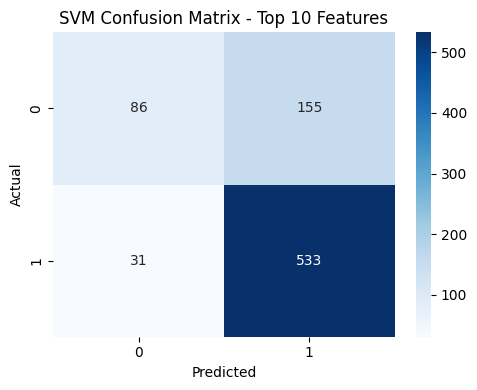


--- SVM on Top 5 Features ---
Accuracy: 0.7702
              precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805



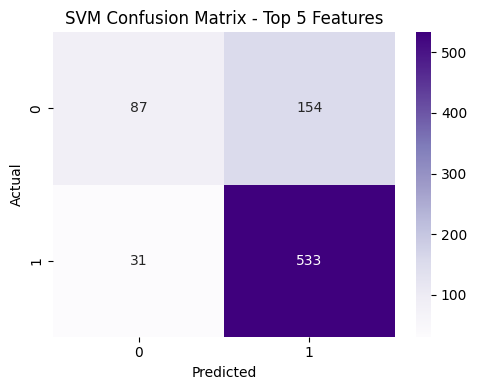

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ---- 1. Load and preprocess the data ----
df = pd.read_csv("breast_cancer.csv")
df.dropna(subset=['Survival Months'], inplace=True)
df['Survival_5yr'] = np.where(df['Survival Months'] >= 60, 1, 0)
df.drop(columns=['Survival Months'], inplace=True)
df = df.dropna(axis=1, how='all')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.columns = df.columns.str.strip()

# ---- 2. Separate features and target ----
X = df.drop('Survival_5yr', axis=1)
y = df['Survival_5yr']

# ---- 3. One-hot encode categorical features ----
X = pd.get_dummies(X, drop_first=True)

# ---- 4. Impute missing values ----
if X.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# ---- 5. Split data ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---- 6. Feature importance using Random Forest ----
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
top10_idx = np.argsort(importances)[-10:]
top5_idx = np.argsort(importances)[-5:]

top10_features = X.columns[top10_idx]
top5_features = X.columns[top5_idx]

print("\nTop 10 features:", top10_features.tolist())
print("Top 5 features:", top5_features.tolist())

# ---- 7. Scale and Train SVM on Top 10 Features ----
scaler_10 = StandardScaler()
X_train_top10 = scaler_10.fit_transform(X_train[top10_features])
X_test_top10 = scaler_10.transform(X_test[top10_features])

svm_top10 = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_top10.fit(X_train_top10, y_train)
y_pred_10 = svm_top10.predict(X_test_top10)

print("\n--- SVM on Top 10 Features ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_10):.4f}")
print(classification_report(y_test, y_pred_10))

# Confusion Matrix for Top 10
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_10), annot=True, fmt='d', cmap='Blues')
plt.title("SVM Confusion Matrix - Top 10 Features")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# ---- 8. Scale and Train SVM on Top 5 Features ----
scaler_5 = StandardScaler()
X_train_top5 = scaler_5.fit_transform(X_train[top5_features])
X_test_top5 = scaler_5.transform(X_test[top5_features])

svm_top5 = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_top5.fit(X_train_top5, y_train)
y_pred_5 = svm_top5.predict(X_test_top5)

print("\n--- SVM on Top 5 Features ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_5):.4f}")
print(classification_report(y_test, y_pred_5))

# Confusion Matrix for Top 5
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_5), annot=True, fmt='d', cmap='Purples')
plt.title("SVM Confusion Matrix - Top 5 Features")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



--- SVM (All Features) ---
Accuracy: 0.7701863354037267

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805

Confusion Matrix:


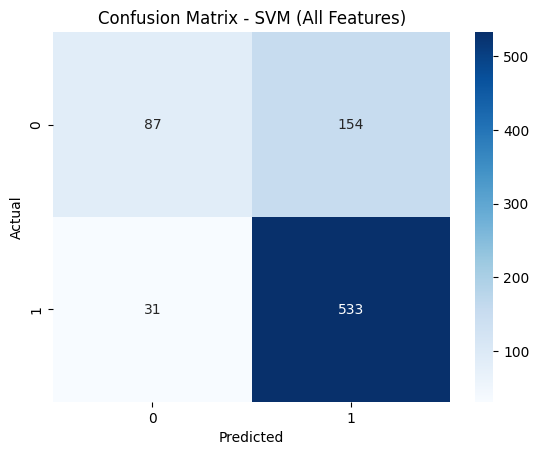


--- SVM (Top 10 Features) ---
Accuracy: 0.7701863354037267

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805

Confusion Matrix:


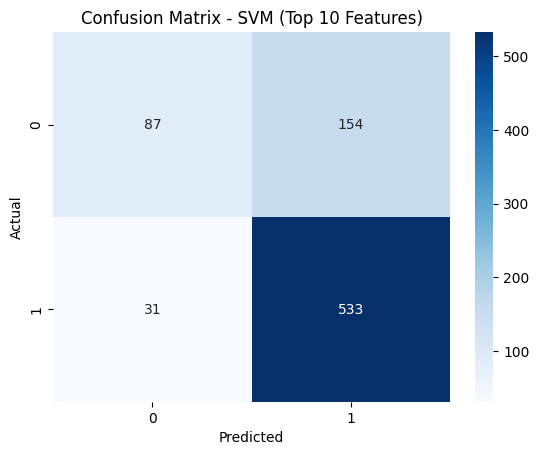

Top 10 features used: ['6th Stage_IIIC', '6th Stage_IIIB', 'T Stage _T4', 'Tumor Size', 'N Stage_N2', 'T Stage _T2', 'T Stage _T3', '6th Stage_IIB', '6th Stage_IIIA', 'Status_Dead']

--- SVM (Top 5 Features) ---
Accuracy: 0.7701863354037267

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805

Confusion Matrix:


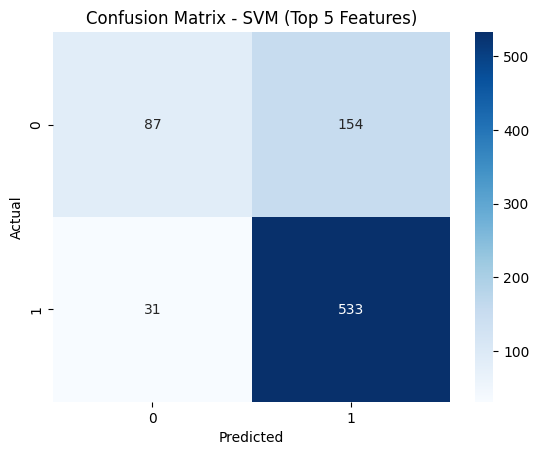

Top 5 features used: ['T Stage _T2', 'T Stage _T3', '6th Stage_IIB', '6th Stage_IIIA', 'Status_Dead']


In [83]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and clean the dataset
df = pd.read_csv("breast_cancer.csv")
df = df.dropna(axis=1, how='all')  # Drop completely empty columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Remove unnamed index columns

# 2. Drop rows with missing survival months
df.dropna(subset=['Survival Months'], inplace=True)

# 3. Create binary target: survived 5+ years
df['Survival_5yr'] = np.where(df['Survival Months'] >= 60, 1, 0)

# 4. Drop original survival column
df.drop(columns=['Survival Months'], inplace=True)

# 5. Set target and features
target = 'Survival_5yr'
X_full = df.drop(target, axis=1)
y = df[target]

# Encode target if needed
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# 6. Handle categorical features
categorical_cols = X_full.select_dtypes(include='object').columns.tolist()
if categorical_cols:
    X_full = pd.get_dummies(X_full, columns=categorical_cols, drop_first=True)

# 7. Impute missing values
if X_full.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='mean')
    X_full = pd.DataFrame(imputer.fit_transform(X_full), columns=X_full.columns)

# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

# 9. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 10. Train SVM on all features
svm_full = SVC(kernel='linear', random_state=42)
svm_full.fit(X_train_scaled, y_train)

# Feature importance from coef_
importance = np.abs(svm_full.coef_[0])
feature_names = X_full.columns
top10_idx = np.argsort(importance)[-10:]
top5_idx = np.argsort(importance)[-5:]
top10_features = feature_names[top10_idx]
top5_features = feature_names[top5_idx]

# ========== EVALUATION FUNCTION ========== #
def evaluate_model(model, X_test_scaled, y_test, title):
    y_pred = model.predict(X_test_scaled)
    print(f"\n--- {title} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# 11. Evaluate full model
evaluate_model(svm_full, X_test_scaled, y_test, "SVM (All Features)")

# 12. Train SVM on top 10 features
X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]
scaler10 = StandardScaler()
X_train_top10_scaled = scaler10.fit_transform(X_train_top10)
X_test_top10_scaled = scaler10.transform(X_test_top10)
svm_top10 = SVC(kernel='linear', random_state=42)
svm_top10.fit(X_train_top10_scaled, y_train)

# 13. Evaluate top 10
evaluate_model(svm_top10, X_test_top10_scaled, y_test, "SVM (Top 10 Features)")
print("Top 10 features used:", list(top10_features))

# 14. Train SVM on top 5 features
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]
scaler5 = StandardScaler()
X_train_top5_scaled = scaler5.fit_transform(X_train_top5)
X_test_top5_scaled = scaler5.transform(X_test_top5)
svm_top5 = SVC(kernel='linear', random_state=42)
svm_top5.fit(X_train_top5_scaled, y_train)

# 15. Evaluate top 5
evaluate_model(svm_top5, X_test_top5_scaled, y_test, "SVM (Top 5 Features)")
print("Top 5 features used:", list(top5_features))



Best Parameters (All Features): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

--- SVM (Tuned, All Features) ---
Accuracy: 0.7701863354037267

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805

Confusion Matrix:


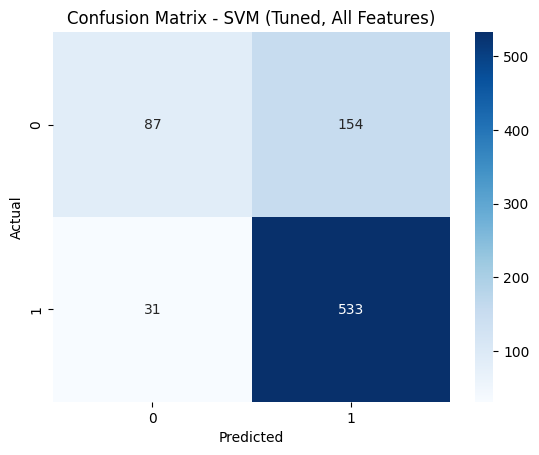


Best Parameters (Top 10 Features): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

--- SVM (Tuned, Top 10 Features) ---
Accuracy: 0.7701863354037267

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805

Confusion Matrix:


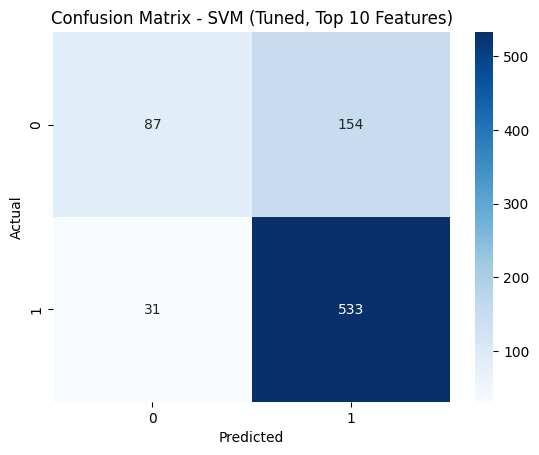

Top 10 Features Used: ['N Stage_N3', '6th Stage_IIIC', 'N Stage_N2', 'T Stage _T2', '6th Stage_IIIB', 'T Stage _T4', 'T Stage _T3', '6th Stage_IIIA', '6th Stage_IIB', 'Status_Dead']

Best Parameters (Top 5 Features): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

--- SVM (Tuned, Top 5 Features) ---
Accuracy: 0.7701863354037267

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.36      0.48       241
           1       0.78      0.95      0.85       564

    accuracy                           0.77       805
   macro avg       0.76      0.65      0.67       805
weighted avg       0.76      0.77      0.74       805

Confusion Matrix:


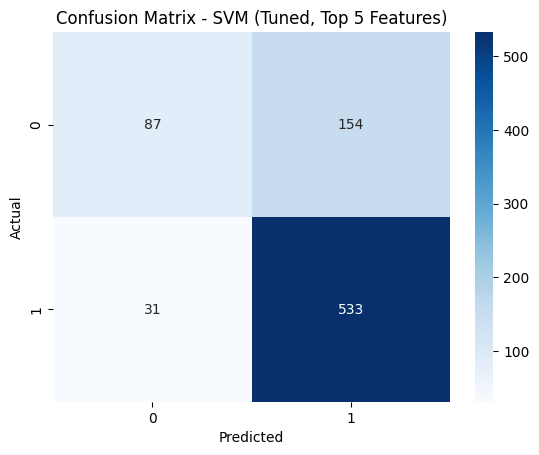

Top 5 Features Used: ['T Stage _T4', 'T Stage _T3', '6th Stage_IIIA', '6th Stage_IIB', 'Status_Dead']


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load and clean the dataset
df = pd.read_csv("breast_cancer.csv")
df = df.dropna(axis=1, how='all')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# 2. Drop rows with missing survival months
df.dropna(subset=['Survival Months'], inplace=True)

# 3. Create binary target
df['Survival_5yr'] = np.where(df['Survival Months'] >= 60, 1, 0)
df.drop(columns=['Survival Months'], inplace=True)

# 4. Set target and features
target = 'Survival_5yr'
X_full = df.drop(target, axis=1)
y = df[target]

# Encode target if needed
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Encode categorical features
categorical_cols = X_full.select_dtypes(include='object').columns.tolist()
if categorical_cols:
    X_full = pd.get_dummies(X_full, columns=categorical_cols, drop_first=True)

# Impute missing
if X_full.isnull().sum().sum() > 0:
    imputer = SimpleImputer(strategy='mean')
    X_full = pd.DataFrame(imputer.fit_transform(X_full), columns=X_full.columns)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ===== HYPERPARAMETER TUNING =====
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']  # Only used for RBF
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
print("\nBest Parameters (All Features):", grid_search.best_params_)

# ===== Feature importance (for linear only) =====
if grid_search.best_params_['kernel'] == 'linear':
    importance = np.abs(best_model.coef_[0])
    feature_names = X_full.columns
    top10_idx = np.argsort(importance)[-10:]
    top5_idx = np.argsort(importance)[-5:]
    top10_features = feature_names[top10_idx]
    top5_features = feature_names[top5_idx]
else:
    # Fallback if using non-linear kernel
    top10_features = X_full.columns[:10]
    top5_features = X_full.columns[:5]

# ===== EVALUATION FUNCTION =====
def evaluate_model(model, X_test_scaled, y_test, title):
    y_pred = model.predict(X_test_scaled)
    print(f"\n--- {title} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {title}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# ==== EVALUATE FULL FEATURE MODEL ====
evaluate_model(best_model, X_test_scaled, y_test, "SVM (Tuned, All Features)")

# ==== SVM with TOP 10 FEATURES ====
X_train_10 = X_train[top10_features]
X_test_10 = X_test[top10_features]
scaler10 = StandardScaler()
X_train_10_scaled = scaler10.fit_transform(X_train_10)
X_test_10_scaled = scaler10.transform(X_test_10)

grid10 = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid10.fit(X_train_10_scaled, y_train)
svm10 = grid10.best_estimator_
print("\nBest Parameters (Top 10 Features):", grid10.best_params_)
evaluate_model(svm10, X_test_10_scaled, y_test, "SVM (Tuned, Top 10 Features)")
print("Top 10 Features Used:", list(top10_features))

# ==== SVM with TOP 5 FEATURES ====
X_train_5 = X_train[top5_features]
X_test_5 = X_test[top5_features]
scaler5 = StandardScaler()
X_train_5_scaled = scaler5.fit_transform(X_train_5)
X_test_5_scaled = scaler5.transform(X_test_5)

grid5 = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid5.fit(X_train_5_scaled, y_train)
svm5 = grid5.best_estimator_
print("\nBest Parameters (Top 5 Features):", grid5.best_params_)
evaluate_model(svm5, X_test_5_scaled, y_test, "SVM (Tuned, Top 5 Features)")
print("Top 5 Features Used:", list(top5_features))

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

# ---- Grid Search for Top 5 Features ----
grid_5 = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_5.fit(X_train_top5_scaled, y_train)
best_params_5 = grid_5.best_params_

print("Best parameters (Top 5):", best_params_5)

# ---- Grid Search for Top 10 Features ----
grid_10 = GridSearchCV(SVC(probability=True), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_10.fit(X_train_top10_scaled, y_train)
best_params_10 = grid_10.best_params_

print("Best parameters (Top 10):", best_params_10)


Best parameters (Top 5): {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best parameters (Top 10): {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}


In [86]:
# Train SVM with best hyperparameters - Top 5
svm_top5 = SVC(**best_params_5, probability=True, random_state=42)
svm_top5.fit(X_train_top5_scaled, y_train)

# Train SVM with best hyperparameters - Top 10
svm_top10 = SVC(**best_params_10, probability=True, random_state=42)
svm_top10.fit(X_train_top10_scaled, y_train)


,C,1
,kernel,'rbf'
,degree,3
,gamma,0.01
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [87]:
import shap

# Create background sample (median or small sample)
X_background_5 = shap.sample(X_train_top5_scaled, 100)

# Predict function for SHAP
def model_predict_top5(X):
    return svm_top5.predict_proba(X)[:, 1]

# Explainer and SHAP values
explainer_5 = shap.KernelExplainer(model_predict_top5, X_background_5)
shap_values_5 = explainer_5.shap_values(X_test_top5_scaled[:100])


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

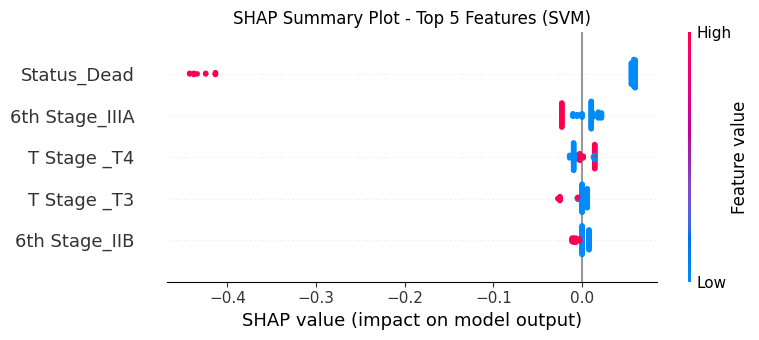

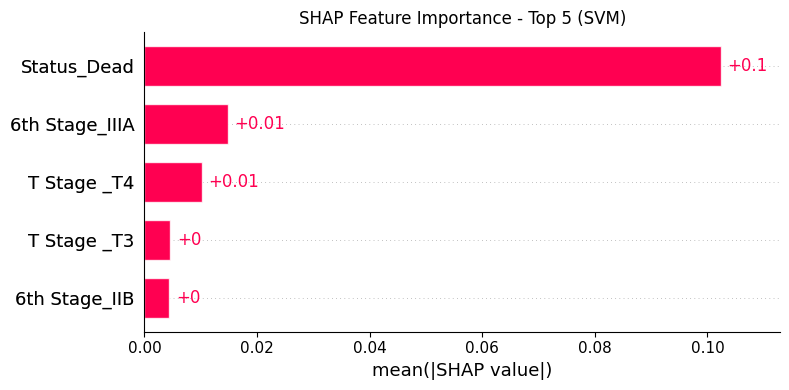

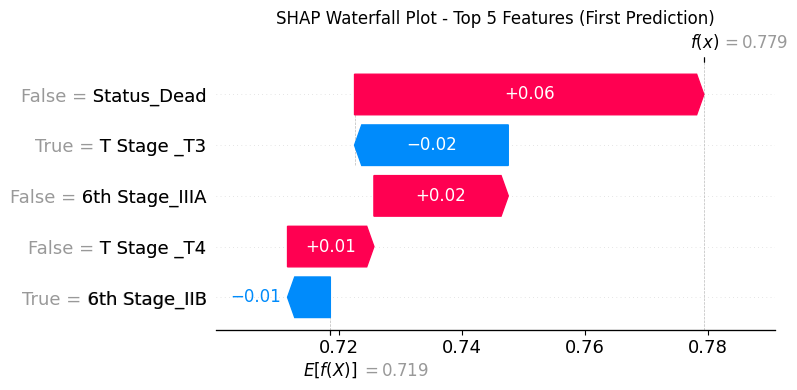

In [88]:
import shap
import matplotlib.pyplot as plt

# Background for SHAP (sampling 100 instances)
X_background_5 = shap.sample(X_train_top5_scaled, 100)

# Define prediction function
def model_predict_top5(X):
    return svm_top5.predict_proba(X)[:, 1]

# Create SHAP Kernel Explainer
explainer_5 = shap.KernelExplainer(model_predict_top5, X_background_5)

# Compute SHAP values (on 100 test instances)
X_sample_5 = X_test_top5_scaled[:100]
shap_values_5 = explainer_5.shap_values(X_sample_5)

# ---- SHAP Summary Plot (Top 5) ----
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_5, features=X_test_top5.iloc[:100], feature_names=top5_features.tolist(), show=False)
plt.title("SHAP Summary Plot - Top 5 Features (SVM)")
plt.tight_layout()
plt.show()

# ---- SHAP Bar Plot (Top 5) ----
plt.figure(figsize=(8, 5))
shap.plots.bar(shap.Explanation(values=shap_values_5, data=X_test_top5.iloc[:100].values, feature_names=top5_features), show=False)
plt.title("SHAP Feature Importance - Top 5 (SVM)")
plt.tight_layout()
plt.show()

# ---- SHAP Waterfall Plot (first prediction) ----
shap.waterfall_plot(shap.Explanation(values=shap_values_5[0], base_values=explainer_5.expected_value, feature_names=top5_features, data=X_test_top5.iloc[0]), show=False)
plt.title("SHAP Waterfall Plot - Top 5 Features (First Prediction)")
plt.tight_layout()
plt.show()


  0%|          | 0/100 [00:00<?, ?it/s]

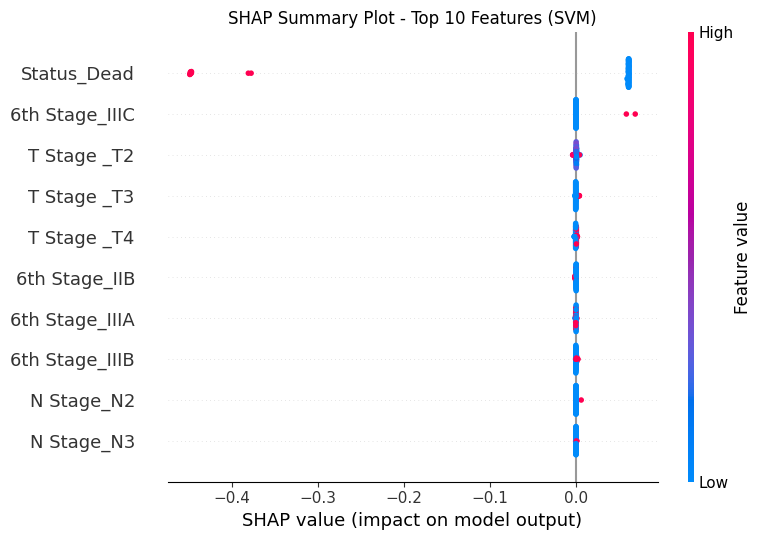

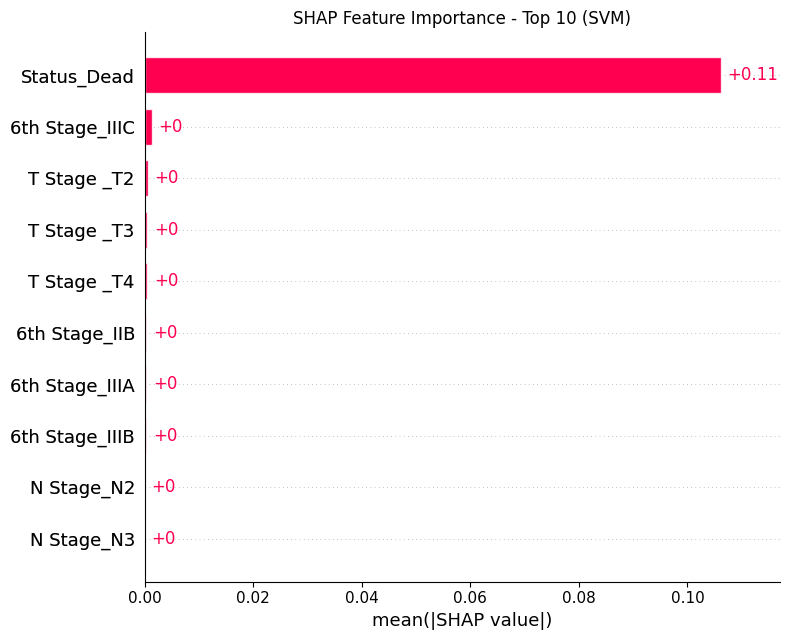

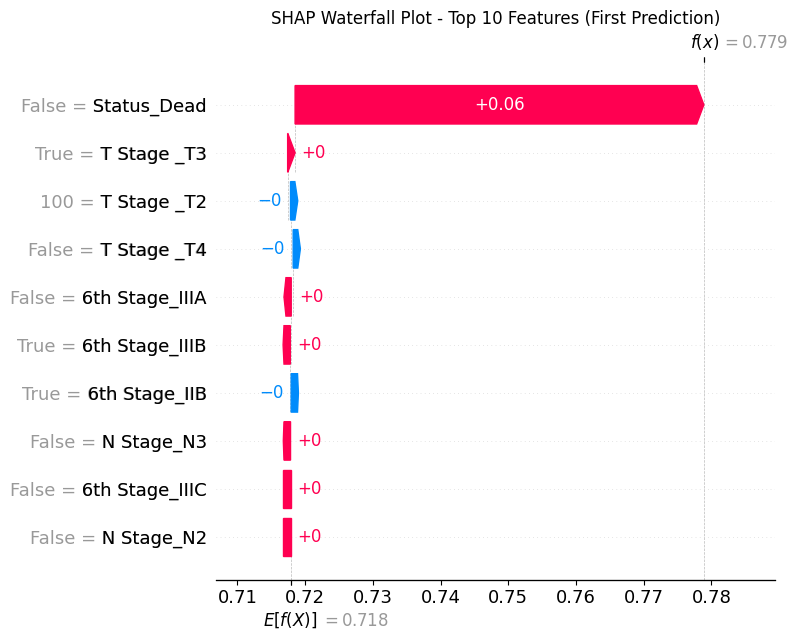

In [89]:
# Background for SHAP
X_background_10 = shap.sample(X_train_top10_scaled, 100)

# Prediction function
def model_predict_top10(X):
    return svm_top10.predict_proba(X)[:, 1]

# Explainer
explainer_10 = shap.KernelExplainer(model_predict_top10, X_background_10)

# Compute SHAP values
X_sample_10 = X_test_top10_scaled[:100]
shap_values_10 = explainer_10.shap_values(X_sample_10)

# ---- SHAP Summary Plot (Top 10) ----
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_10, features=X_test_top10.iloc[:100], feature_names=top10_features.tolist(), show=False)
plt.title("SHAP Summary Plot - Top 10 Features (SVM)")
plt.tight_layout()
plt.show()

# ---- SHAP Bar Plot (Top 10) ----
plt.figure(figsize=(8, 5))
shap.plots.bar(shap.Explanation(values=shap_values_10, data=X_test_top10.iloc[:100].values, feature_names=top10_features), show=False)
plt.title("SHAP Feature Importance - Top 10 (SVM)")
plt.tight_layout()
plt.show()

# ---- SHAP Waterfall Plot (first prediction) ----
shap.waterfall_plot(shap.Explanation(values=shap_values_10[0], base_values=explainer_10.expected_value, feature_names=top10_features, data=X_test_top10.iloc[0]), show=False)
plt.title("SHAP Waterfall Plot - Top 10 Features (First Prediction)")
plt.tight_layout()
plt.show()


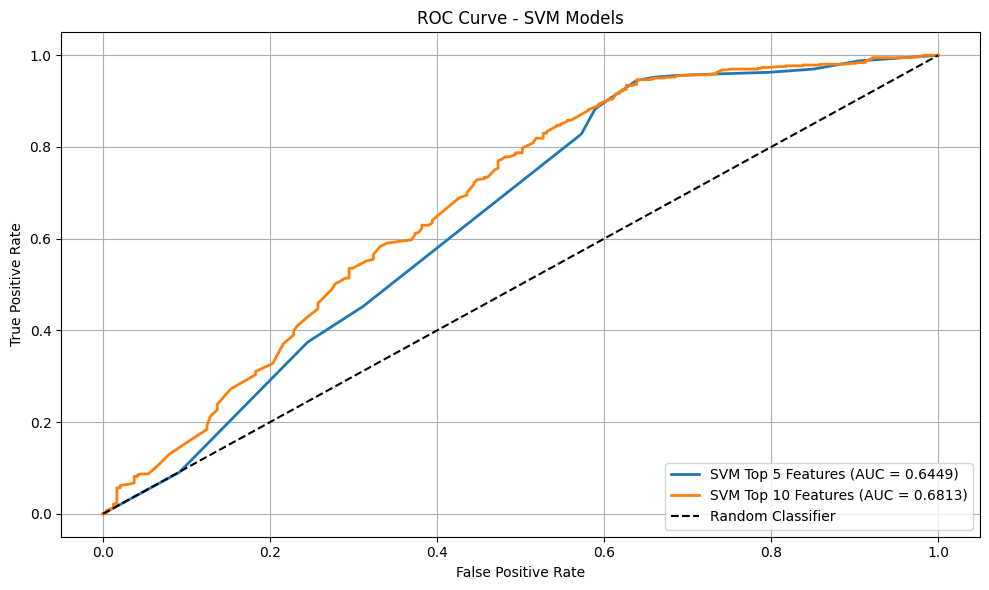

ROC-AUC (Top 5 Features): 0.6449
ROC-AUC (Top 10 Features): 0.6813


In [90]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# ---- Top 5 Features ----
y_prob_top5 = svm_top5.predict_proba(X_test_top5_scaled)[:, 1]
roc_auc_5 = roc_auc_score(y_test, y_prob_top5)
fpr_5, tpr_5, _ = roc_curve(y_test, y_prob_top5)

# ---- Top 10 Features ----
y_prob_top10 = svm_top10.predict_proba(X_test_top10_scaled)[:, 1]
roc_auc_10 = roc_auc_score(y_test, y_prob_top10)
fpr_10, tpr_10, _ = roc_curve(y_test, y_prob_top10)

# ---- Plot ROC Curves ----
plt.figure(figsize=(10, 6))
plt.plot(fpr_5, tpr_5, label=f"SVM Top 5 Features (AUC = {roc_auc_5:.4f})", linewidth=2)
plt.plot(fpr_10, tpr_10, label=f"SVM Top 10 Features (AUC = {roc_auc_10:.4f})", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print AUC scores
print(f"ROC-AUC (Top 5 Features): {roc_auc_5:.4f}")
print(f"ROC-AUC (Top 10 Features): {roc_auc_10:.4f}")


In [91]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# Load the data
df = pd.read_csv("breast_cancer.csv")

# Example cleaning steps:
# Convert 'Survival Months' to numeric (if applicable)
df['Survival Months'] = pd.to_numeric(df['Survival Months'], errors='coerce')

# Drop rows with missing survival months
df.dropna(subset=['Survival Months'], inplace=True)

# Create binary target variable: survived >= 5 years or not
df['Survival_5yr'] = np.where(df['Survival Months'] >= 60, 1, 0)

# Drop original survival columns to avoid leakage
df.drop(['Status', 'Survival Months'], axis=1, inplace=True)

# Strip whitespace in column names
df.columns = df.columns.str.strip()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Define features and target
X = df_encoded.drop('Survival_5yr', axis=1)
y = df_encoded['Survival_5yr']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [93]:
# Initialize XGBoost classifier
model = xgb.XGBClassifier(
    use_label_encoder=False,  # suppress warning
    eval_metric='logloss',
    random_state=42
)

# Fit model
model.fit(X_train, y_train)

C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:41:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [94]:
# Predict on test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Optional: Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.38      0.18      0.24       241
           1       0.71      0.88      0.79       564

    accuracy                           0.67       805
   macro avg       0.55      0.53      0.52       805
weighted avg       0.62      0.67      0.62       805

Accuracy: 0.6683


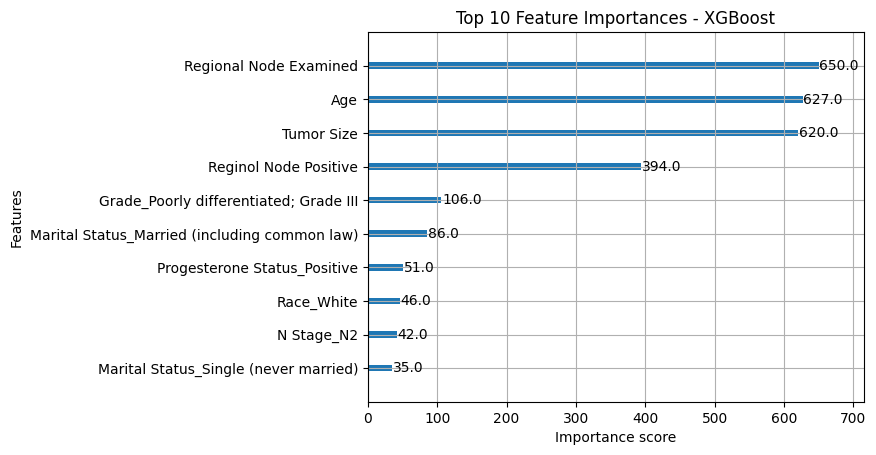

In [95]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances - XGBoost")
plt.show()


In [96]:
!pip install xgboost

In [97]:
df.columns = df.columns.str.strip()

In [98]:
print(df.columns)

Index(['Age', 'Race', 'Marital Status', 'Unnamed: 3', 'T Stage', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival_5yr'],
      dtype='object')


# Get feature importances from a full XGBoost model to pick top features

In [99]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Train full model to get feature importances
full_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
full_model.fit(X_train, y_train)

# Get feature importances as pandas Series
feat_importances = pd.Series(full_model.feature_importances_, index=X_train.columns)

# Top 5 and Top 10 features
top5_features = feat_importances.sort_values(ascending=False).head(5).index
top10_features = feat_importances.sort_values(ascending=False).head(10).index

C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:41:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Function to train, evaluate, and explain model with SHAP

In [100]:
def train_evaluate_shap(X_train_sub, X_test_sub, y_train, y_test, top_features, title_suffix):
    print(f"Training model with top {len(top_features)} features...")

    # Train model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train_sub, y_train)

    # Predict
    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)[:, 1]

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # SHAP explainability
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_sub)

    # Summary plots
    print("SHAP summary plot (bar)...")
    shap.summary_plot(shap_values, X_test_sub, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance (Top {len(top_features)}) {title_suffix}")
    plt.show()

    print("SHAP summary plot (dot)...")
    shap.summary_plot(shap_values, X_test_sub, show=False)
    plt.title(f"SHAP Summary Plot (Top {len(top_features)}) {title_suffix}")
    plt.show()

    # Waterfall plot for one sample
    sample_idx = 0
    print(f"SHAP waterfall plot for sample {sample_idx}...")
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[sample_idx], X_test_sub.iloc[sample_idx])

    print("-" * 40)

# Run for Top 5 features

Training model with top 5 features...
Accuracy: 0.7056
F1-score: 0.8261
ROC-AUC: 0.5390


C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SHAP summary plot (bar)...


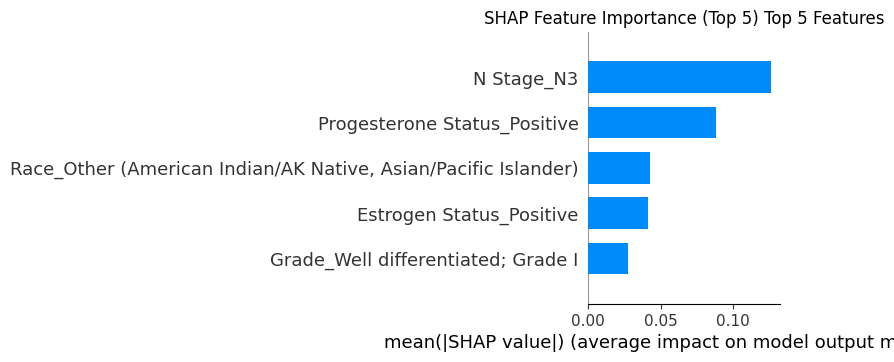

SHAP summary plot (dot)...


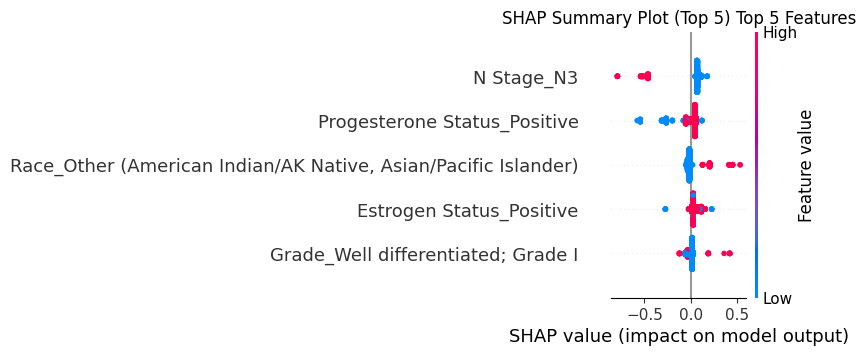

SHAP waterfall plot for sample 0...


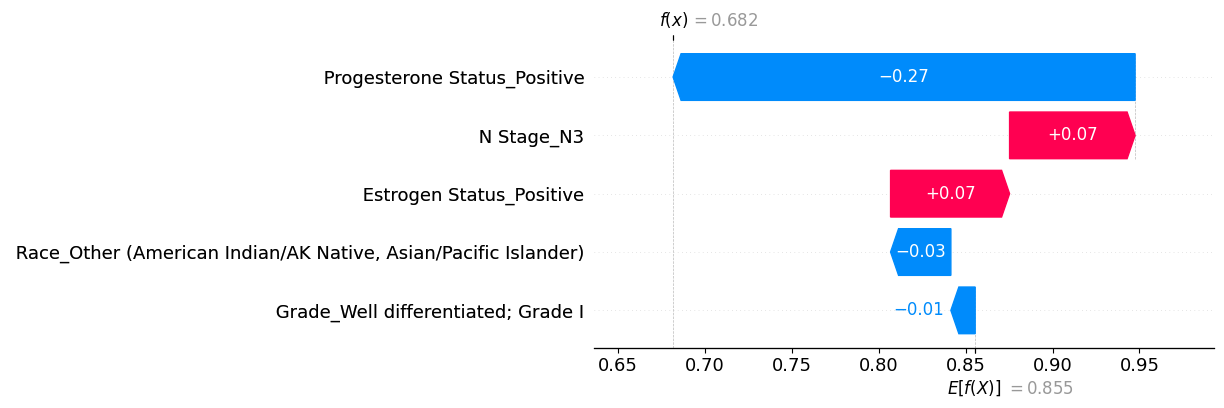

----------------------------------------


In [101]:
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

train_evaluate_shap(X_train_top5, X_test_top5, y_train, y_test, top5_features, "Top 5 Features")


# Run for Top 10 features

Training model with top 10 features...
Accuracy: 0.6547
F1-score: 0.7794
ROC-AUC: 0.5164


C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


SHAP summary plot (bar)...


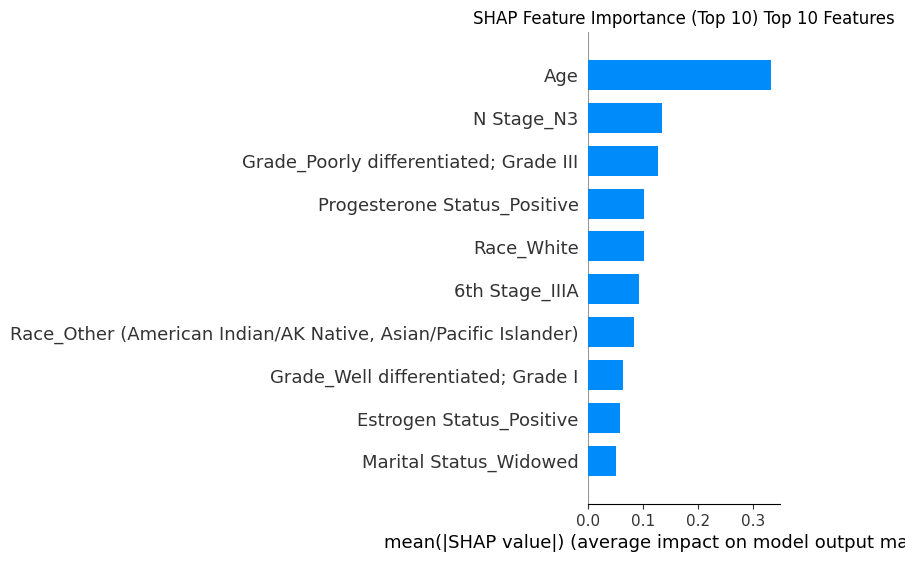

SHAP summary plot (dot)...


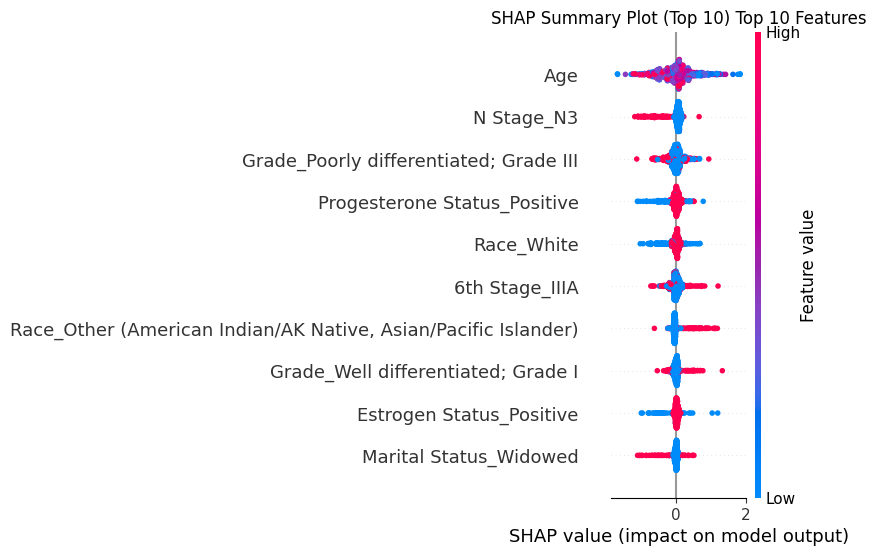

SHAP waterfall plot for sample 0...


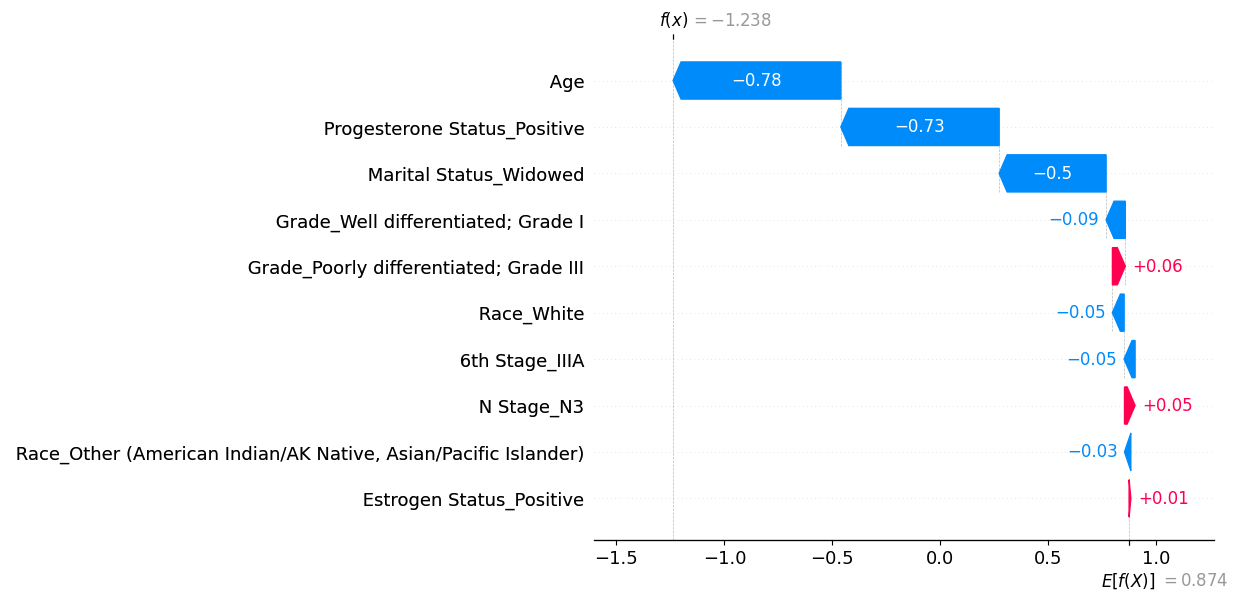

----------------------------------------


In [102]:
X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]

train_evaluate_shap(X_train_top10, X_test_top10, y_train, y_test, top10_features, "Top 10 Features")


# Define hyperparameter grid and run GridSearchCV

In [103]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1],
}

# Base model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grid search with 3-fold CV (for speed, increase cv folds for better tuning)
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit grid search on training data with ALL features first (to get best params)
grid_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(grid_search.best_params_)


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters found:
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}


C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


# Train and evaluate final models with tuned parameters on top 5 and top 10 features

C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:24] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training tuned XGBoost with top 5 features...
Accuracy: 0.7006
F1-score: 0.8240
ROC-AUC: 0.5409


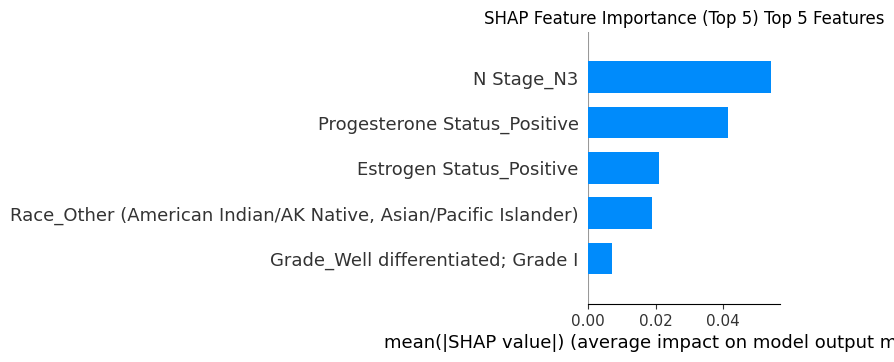

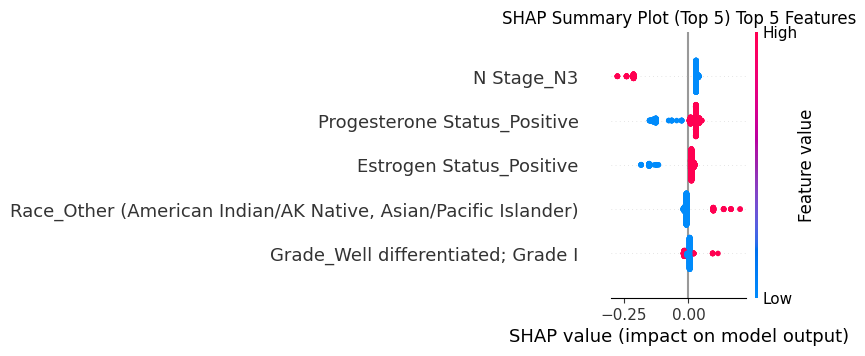

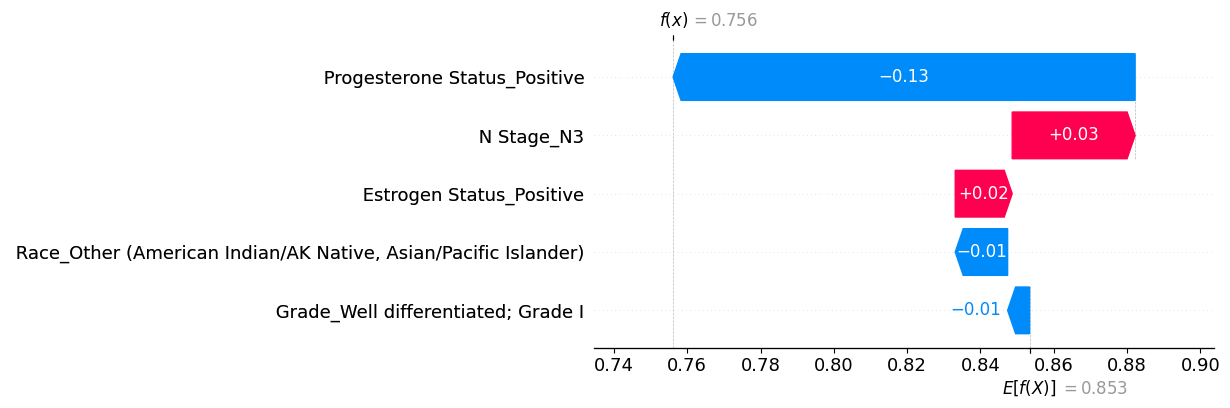

----------------------------------------
Training tuned XGBoost with top 10 features...
Accuracy: 0.7006
F1-score: 0.8240
ROC-AUC: 0.5564


C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


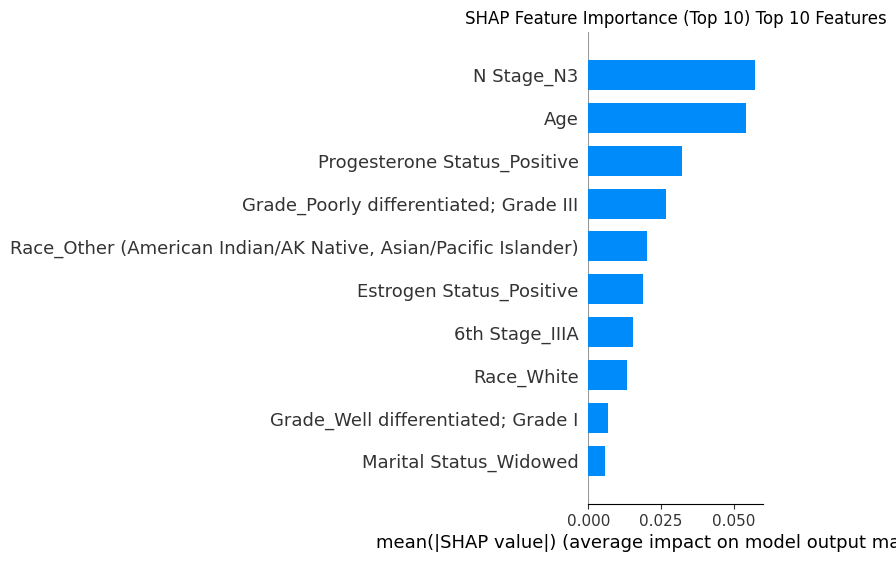

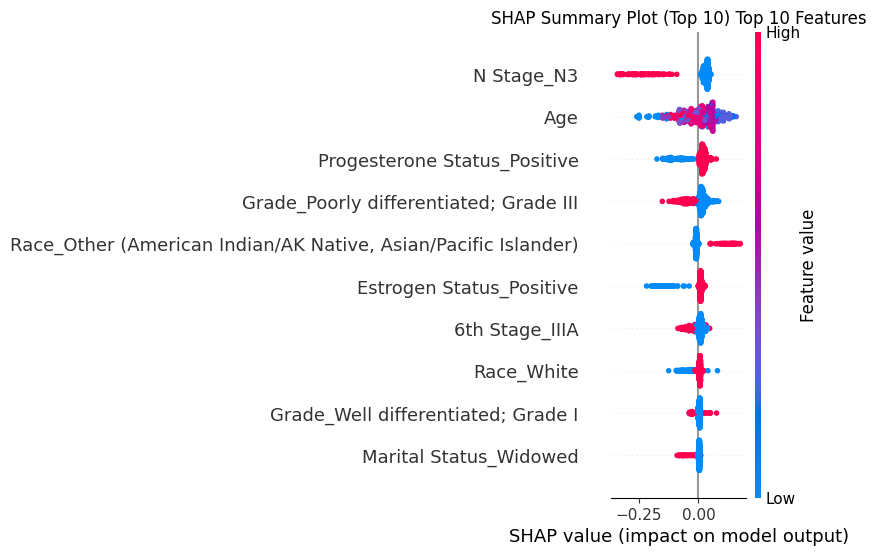

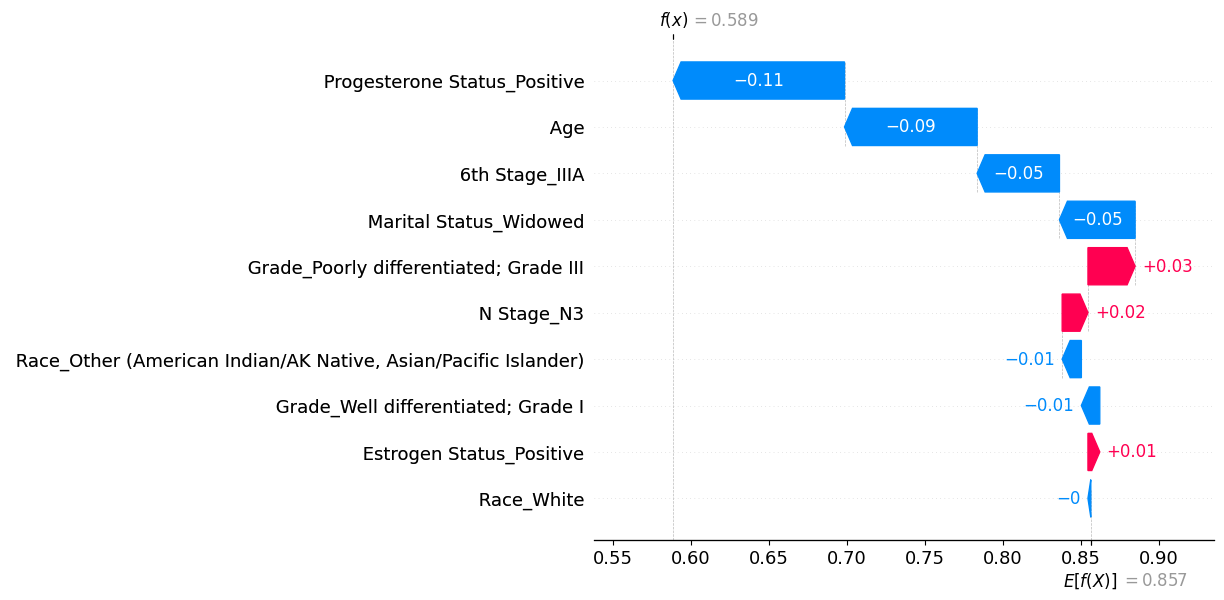

----------------------------------------


In [104]:
# Get best params from grid search
best_params = grid_search.best_params_

def train_tuned_xgb(X_train_sub, X_test_sub, y_train, y_test, top_features, params, title_suffix):
    print(f"Training tuned XGBoost with top {len(top_features)} features...")

    model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **params
    )
    model.fit(X_train_sub, y_train)

    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # SHAP explainability
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_sub)

    shap.summary_plot(shap_values, X_test_sub, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance (Top {len(top_features)}) {title_suffix}")
    plt.show()

    shap.summary_plot(shap_values, X_test_sub, show=False)
    plt.title(f"SHAP Summary Plot (Top {len(top_features)}) {title_suffix}")
    plt.show()

    sample_idx = 0
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[sample_idx], X_test_sub.iloc[sample_idx])

    print("-" * 40)


# Prepare datasets
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]

# Run for top 5
train_tuned_xgb(X_train_top5, X_test_top5, y_train, y_test, top5_features, best_params, "Top 5 Features")

# Run for top 10
train_tuned_xgb(X_train_top10, X_test_top10, y_train, y_test, top10_features, best_params, "Top 10 Features")


In [105]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

def train_tuned_xgb(X_train_sub, X_test_sub, y_train, y_test, top_features, params, title_suffix):
    print(f"Training tuned XGBoost with top {len(top_features)} features...")

    model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **params
    )
    model.fit(X_train_sub, y_train)

    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - XGBoost ({title_suffix})')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # SHAP explainability
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_sub)

    shap.summary_plot(shap_values, X_test_sub, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance (Top {len(top_features)}) {title_suffix}")
    plt.show()

    shap.summary_plot(shap_values, X_test_sub, show=False)
    plt.title(f"SHAP Summary Plot (Top {len(top_features)}) {title_suffix}")
    plt.show()

    sample_idx = 0
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[sample_idx], X_test_sub.iloc[sample_idx])

    print("-" * 40)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best hyperparameters: {'colsample_bytree': 1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1}

Training XGBoost with top 5 features...


C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.6795
F1-score: 0.8092
ROC-AUC: 0.5452


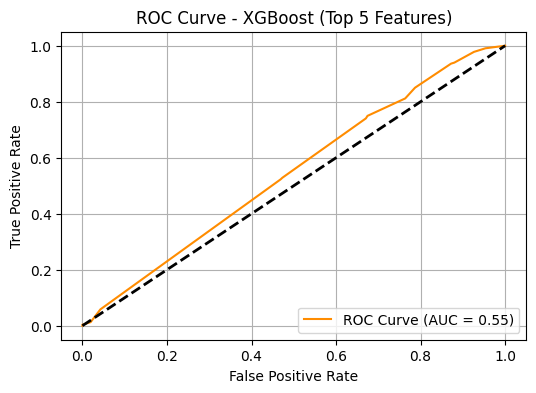

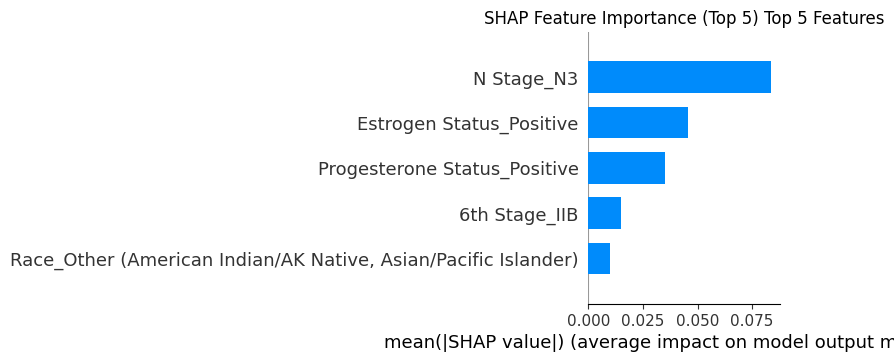

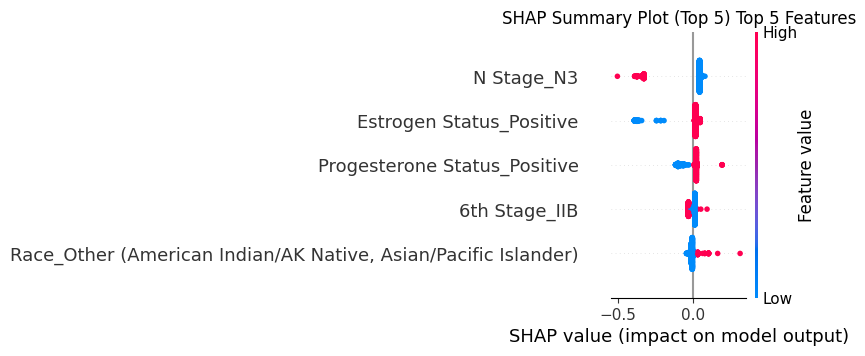

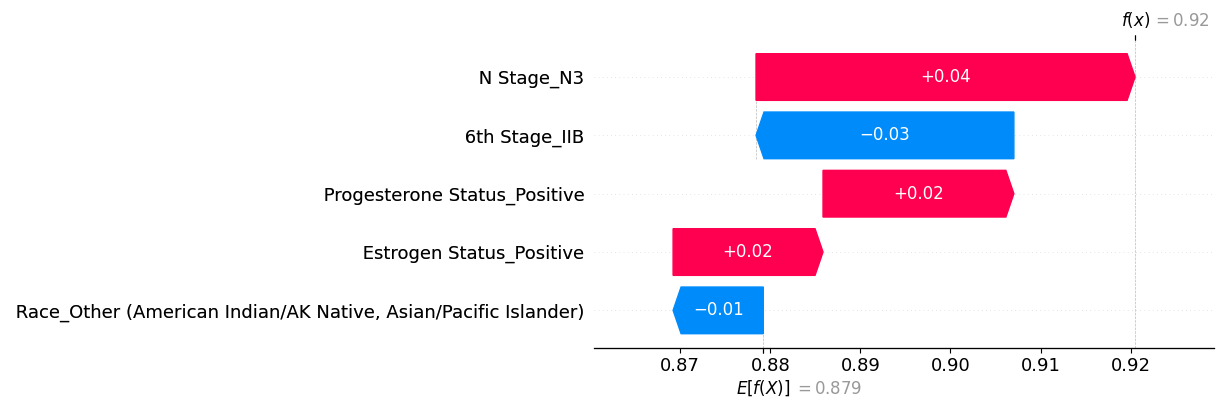


Training XGBoost with top 10 features...
Accuracy: 0.6820
F1-score: 0.8098
ROC-AUC: 0.5454


C:\Users\yeman\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:42:31] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


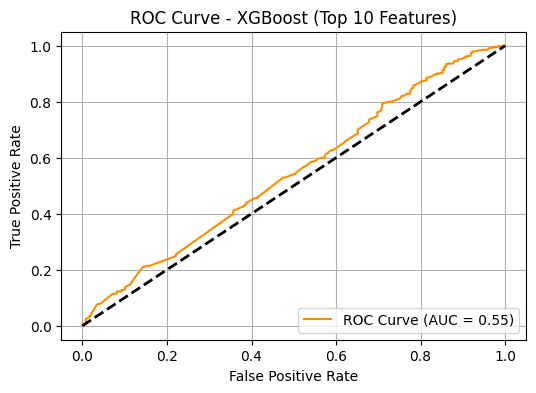

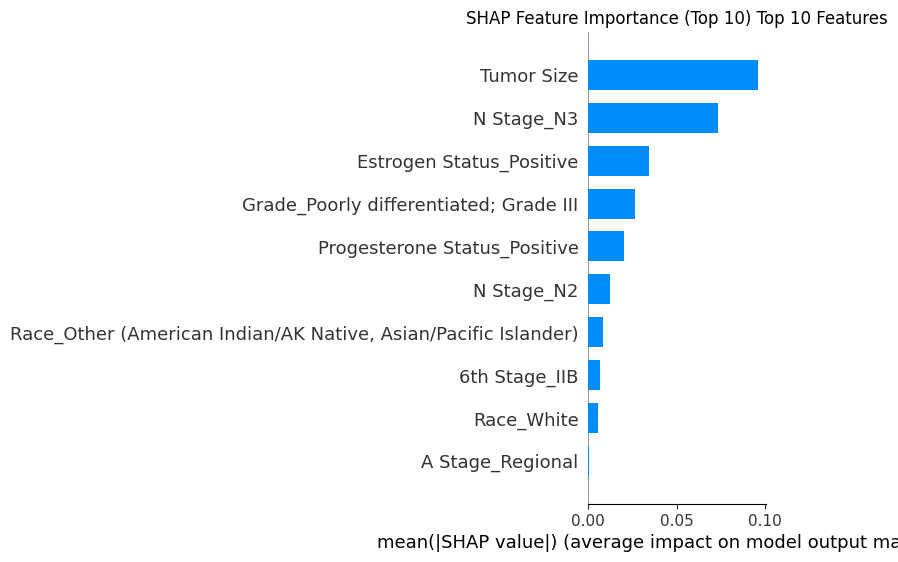

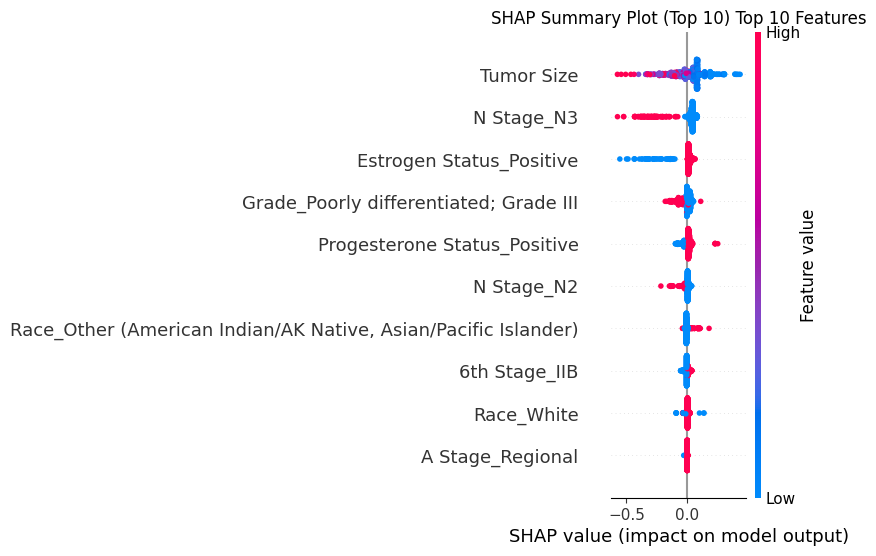

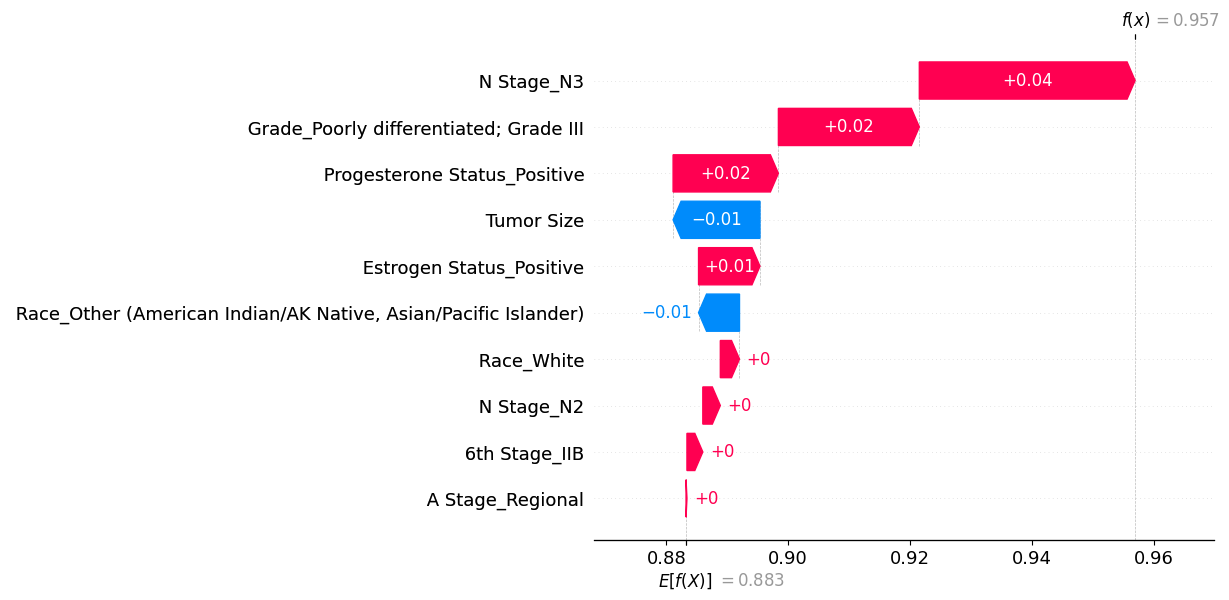

In [106]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import shap
import matplotlib.pyplot as plt

# 1. Split data if not done yet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Hyperparameter tuning on full feature set
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1],
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# 3. Train base model with best params to get feature importances
model_full = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **best_params)
model_full.fit(X_train, y_train)

feat_importances = pd.Series(model_full.feature_importances_, index=X_train.columns)
top5_features = feat_importances.sort_values(ascending=False).head(5).index
top10_features = feat_importances.sort_values(ascending=False).head(10).index

# 4. Define training + evaluation function with SHAP & ROC plotting
def train_tuned_xgb(X_train_sub, X_test_sub, y_train, y_test, top_features, params, title_suffix):
    print(f"\nTraining XGBoost with top {len(top_features)} features...")

    model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **params
    )
    model.fit(X_train_sub, y_train)

    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - XGBoost ({title_suffix})')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # SHAP explainability
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_sub)

    shap.summary_plot(shap_values, X_test_sub, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance (Top {len(top_features)}) {title_suffix}")
    plt.show()

    shap.summary_plot(shap_values, X_test_sub, show=False)
    plt.title(f"SHAP Summary Plot (Top {len(top_features)}) {title_suffix}")
    plt.show()

    sample_idx = 0
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[sample_idx], X_test_sub.iloc[sample_idx])

# 5. Prepare subsets and run for top 5 and top 10
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]
train_tuned_xgb(X_train_top5, X_test_top5, y_train, y_test, top5_features, best_params, "Top 5 Features")

X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]
train_tuned_xgb(X_train_top10, X_test_top10, y_train, y_test, top10_features, best_params, "Top 10 Features")


## to keep them for next steps

In [ ]:
df.columns = df.columns.str.strip()

## Get feature importances from a full XGBoost model to pick top features

In [ ]:
# Train full model to get feature importances
full_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
full_model.fit(X_train, y_train)

# Get feature importances as pandas Series
feat_importances = pd.Series(full_model.feature_importances_, index=X_train.columns)

# Top 5 and Top 10 features
top5_features = feat_importances.sort_values(ascending=False).head(5).index
top10_features = feat_importances.sort_values(ascending=False).head(10).index

## Function to train, evaluate, and explain model with SHAP

In [ ]:
def train_evaluate_shap(X_train_sub, X_test_sub, y_train, y_test, top_features, title_suffix):
    print(f"Training model with top {len(top_features)} features...")

    # Train model
    model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
    model.fit(X_train_sub, y_train)

    # Predict
    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)[:, 1]

    # Evaluate
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # SHAP explainability
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_sub)

    # Summary plots
    print("SHAP summary plot (bar)...")
    shap.summary_plot(shap_values, X_test_sub, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance (Top {len(top_features)}) {title_suffix}")
    plt.show()

    print("SHAP summary plot (dot)...")
    shap.summary_plot(shap_values, X_test_sub, show=False)
    plt.title(f"SHAP Summary Plot (Top {len(top_features)}) {title_suffix}")
    plt.show()

    # Waterfall plot for one sample
    sample_idx = 0
    print(f"SHAP waterfall plot for sample {sample_idx}...")
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[sample_idx], X_test_sub.iloc[sample_idx])

    print("-" * 40)

## Run for Top 5 features

In [ ]:
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

train_evaluate_shap(X_train_top5, X_test_top5, y_train, y_test, top5_features, "Top 5 Features")

## Run for Top 10 features

In [ ]:
X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]

train_evaluate_shap(X_train_top10, X_test_top10, y_train, y_test, top10_features, "Top 10 Features")

## Define hyperparameter grid and run GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1],
}

# Base model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grid seach with 3-fold CV (for speed, increase cv folds for better tuning)
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit grid search on training data with ALL features first (to get best params)
grid_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(grid_search.best_params_)

## Train and evaluate final models with tuned parameters on top 5 and top 10 features¶

In [ ]:
# Get best params from grid search
best_params = grid_search.best_params_

def train_tuned_xgb(X_train_sub, X_test_sub, y_train, y_test, top_features, params, title_suffix):
    print(f"Training tuned XGBoost with top {len(top_features)} features...")

    model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **params
    )
    model.fit(X_train_sub, y_train)

    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # SHAP explainability
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_sub)

    shap.summary_plot(shap_values, X_test_sub, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance (Top {len(top_features)}) {title_suffix}")
    plt.show()

    shap.summary_plot(shap_values, X_test_sub, show=False)
    plt.title(f"SHAP Summary Plot (Top {len(top_features)}) {title_suffix}")
    plt.show()

    sample_idx = 0
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[sample_idx], X_test_sub.iloc[sample_idx])

    print("-" * 40)


# Prepare datasets
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]

# Run for top 5
train_tuned_xgb(X_train_top5, X_test_top5, y_train, y_test, top5_features, best_params, "Top 5 Features")

# Run for top 10
train_tuned_xgb(X_train_top10, X_test_top10, y_train, y_test, top10_features, best_params, "Top 10 Features")

## Define hyperparameter grid and run GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1],
}

# Base model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Grid search with 3-fold CV (for speed, increase cv folds for better tuning)
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit grid search on training data with ALL features first (to get best params)
grid_search.fit(X_train, y_train)

print("Best hyperparameters found:")
print(grid_search.best_params_)

## Train and evaluate final models with tuned parameters on top 5 and top 10 features

In [ ]:
# Get best params from grid search
best_params = grid_search.best_params_

def train_tuned_xgb(X_train_sub, X_test_sub, y_train, y_test, top_features, params, title_suffix):
    print(f"Training tuned XGBoost with top {len(top_features)} features...")

    model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **params
    )
    model.fit(X_train_sub, y_train)

    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # SHAP explainability
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_sub)

    shap.summary_plot(shap_values, X_test_sub, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance (Top {len(top_features)}) {title_suffix}")
    plt.show()

    shap.summary_plot(shap_values, X_test_sub, show=False)
    plt.title(f"SHAP Summary Plot (Top {len(top_features)}) {title_suffix}")
    plt.show()

    sample_idx = 0
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[sample_idx], X_test_sub.iloc[sample_idx])

    print("-" * 40)


# Prepare datasets
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]

X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]

# Run for top 5
train_tuned_xgb(X_train_top5, X_test_top5, y_train, y_test, top5_features, best_params, "Top 5 Features")

# Run for top 10
train_tuned_xgb(X_train_top10, X_test_top10, y_train, y_test, top10_features, best_params, "Top 10 Features")

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
import shap
import matplotlib.pyplot as plt

# 1. Split data if not done yet
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Hyperparameter tuning on full feature set
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1],
}

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# 3. Train base model with best params to get feature importances
model_full = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, **best_params)
model_full.fit(X_train, y_train)

feat_importances = pd.Series(model_full.feature_importances_, index=X_train.columns)
top5_features = feat_importances.sort_values(ascending=False).head(5).index
top10_features = feat_importances.sort_values(ascending=False).head(10).index

# 4. Define training + evaluation function with SHAP & ROC plotting
def train_tuned_xgb(X_train_sub, X_test_sub, y_train, y_test, top_features, params, title_suffix):
    print(f"\nTraining XGBoost with top {len(top_features)} features...")

    model = xgb.XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        **params
    )
    model.fit(X_train_sub, y_train)

    y_pred = model.predict(X_test_sub)
    y_prob = model.predict_proba(X_test_sub)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - XGBoost ({title_suffix})')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

    # SHAP explainability
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test_sub)

    shap.summary_plot(shap_values, X_test_sub, plot_type="bar", show=False)
    plt.title(f"SHAP Feature Importance (Top {len(top_features)}) {title_suffix}")
    plt.show()

    shap.summary_plot(shap_values, X_test_sub, show=False)
    plt.title(f"SHAP Summary Plot (Top {len(top_features)}) {title_suffix}")
    plt.show()

    sample_idx = 0
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[sample_idx], X_test_sub.iloc[sample_idx])

# 5. Prepare subsets and run for top 5 and top 10
X_train_top5 = X_train[top5_features]
X_test_top5 = X_test[top5_features]
train_tuned_xgb(X_train_top5, X_test_top5, y_train, y_test, top5_features, best_params, "Top 5 Features")

X_train_top10 = X_train[top10_features]
X_test_top10 = X_test[top10_features]
train_tuned_xgb(X_train_top10, X_test_top10, y_train, y_test, top10_features, best_params, "Top 10 Features")


## FOR LOGISTIC RIGRASSION

## Dummy Classifier Comparison

In [ ]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train_scaled, y_train)
y_dummy_pred = dummy.predict(X_test_scaled)

print(" Dummy Classifier Accuracy:", accuracy_score(y_test, y_dummy_pred))
print(" Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

## Correlation Check (Optional)

In [ ]:
df_encoded = pd.get_dummies(X, drop_first=True)
df_encoded['Survival_5yr'] = y
correlation = df_encoded.corr()['Survival_5yr'].sort_values(ascending=False)

print("\n Top Correlated Features with Target:")
print(correlation.head(10))
print(correlation.head(5))

Running with sample data...
=== DATA LAYER ===
Generating sample SEER-like data...
Sample dataset generated. Shape: (1000, 11)

=== PROCESSING LAYER ===
Features shape: (1000, 13)
Target distribution: {1: 665, 0: 335}
Processed training data shape: (800, 17)
Processed test data shape: (200, 17)
Selected features shape: (800, 15)

=== MODEL LAYER ===

Training logistic_regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters for logistic_regression: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.7176

Training random_forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for random_forest: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.6967

Training xgboost...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best parameters for xgboost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsa

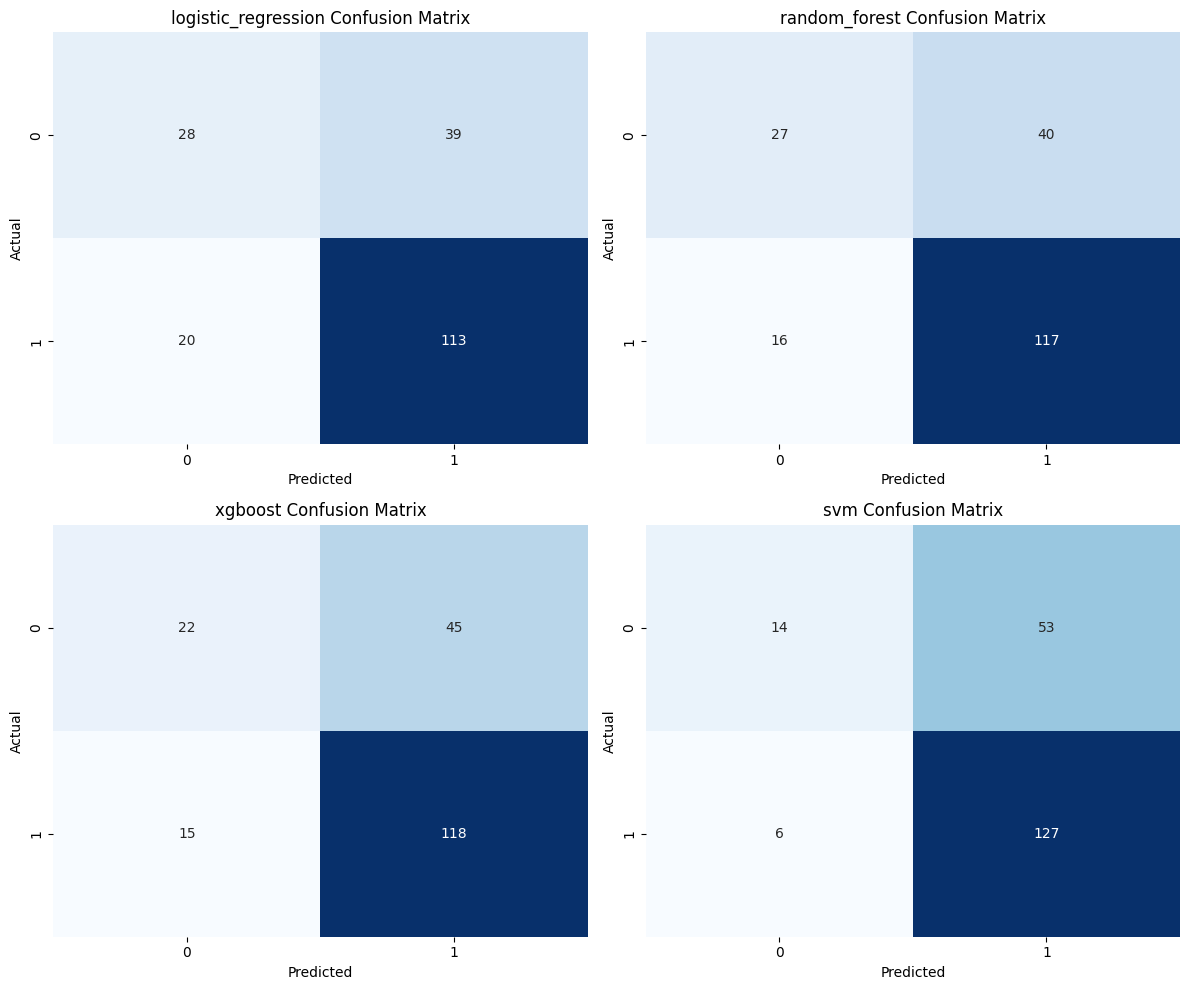


Best model selected: logistic_regression
ROC-AUC: 0.6719

=== INTERPRETATION LAYER ===


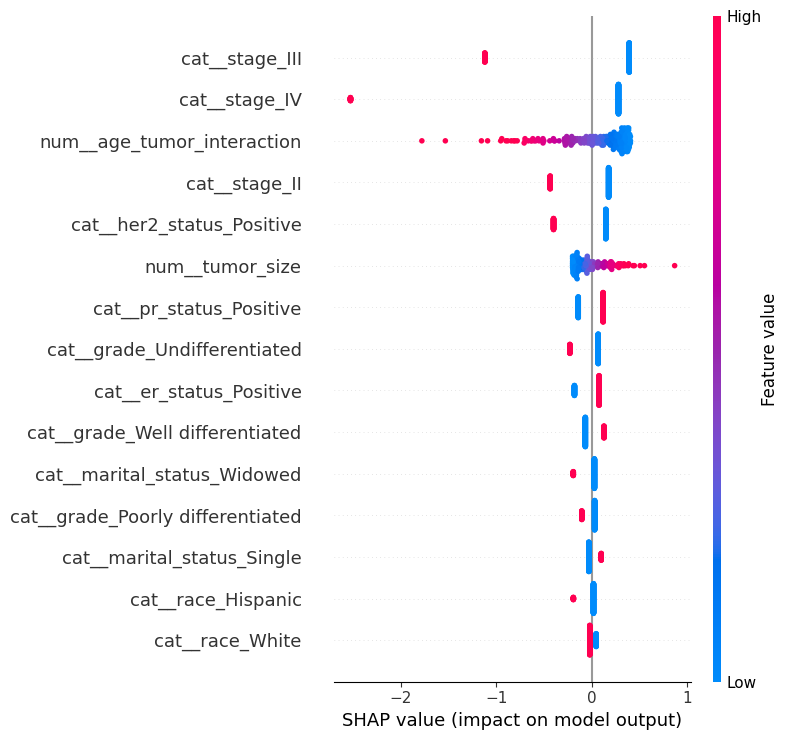

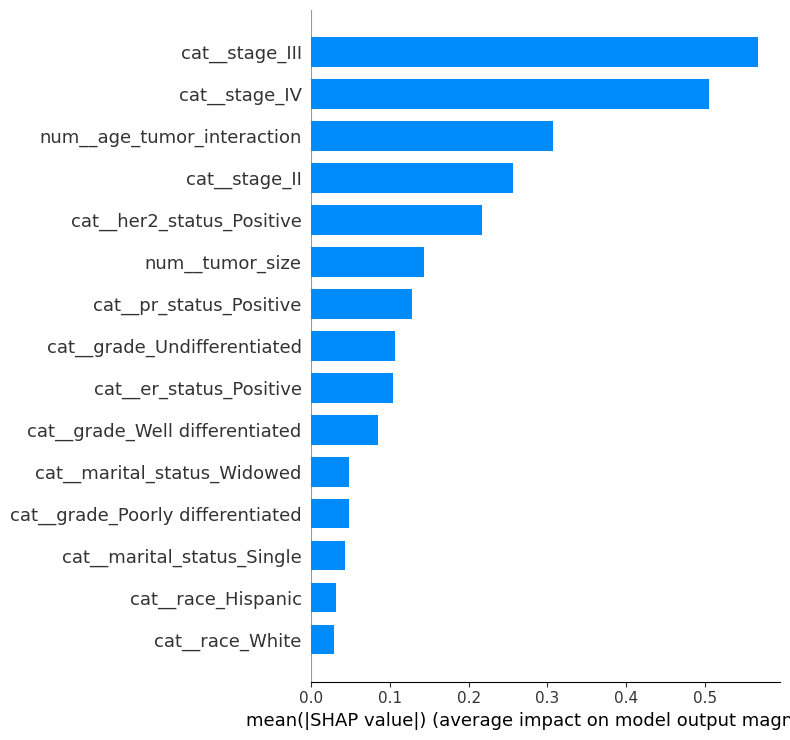


=== CLINICAL DECISION SUPPORT ===
Sample prediction:
  Prediction: 1
  Probability: 0.7399
  Risk Level: High
Model saved to breast_cancer_survival_model.pkl

=== PIPELINE COMPLETED ===
Model training and evaluation completed successfully!
Model saved and ready for clinical decision support.

=== FINAL RESULTS SUMMARY ===

logistic_regression:
  accuracy: 0.7050
  precision: 0.7434
  recall: 0.8496
  f1: 0.7930
  roc_auc: 0.6719

random_forest:
  accuracy: 0.7200
  precision: 0.7452
  recall: 0.8797
  f1: 0.8069
  roc_auc: 0.6675

xgboost:
  accuracy: 0.7000
  precision: 0.7239
  recall: 0.8872
  f1: 0.7973
  roc_auc: 0.6715

svm:
  accuracy: 0.7050
  precision: 0.7056
  recall: 0.9549
  f1: 0.8115
  roc_auc: 0.6555


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost as xgb
import shap
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, Tuple, Any
import warnings
warnings.filterwarnings('ignore')

class BreastCancerSurvivalPredictor:
    """
    Complete machine learning system for breast cancer survival prediction
    following the modular architecture from the workflow diagram.
    """
    
    def __init__(self):
        self.models = {}
        self.preprocessor = None
        self.feature_selector = None
        self.best_model = None
        self.shap_explainer = None
        self.feature_names = None
        
    # DATA LAYER
    def load_and_validate_data(self, data_path: str) -> pd.DataFrame:
        """
        Load SEER dataset and perform initial validation
        """
        try:
            # Load data (assuming CSV format)
            df = pd.read_csv(data_path)
            print(f"Dataset loaded successfully. Shape: {df.shape}")
            
            # Data validation
            print("\n=== DATA VALIDATION ===")
            print(f"Duplicates found: {df.duplicated().sum()}")
            print(f"Missing values per column:\n{df.isnull().sum()}")
            
            # Remove duplicates
            df = df.drop_duplicates()
            
            # Basic data type validation
            print(f"\nData types:\n{df.dtypes}")
            
            return df
            
        except Exception as e:
            print(f"Error loading data: {e}")
            return None
    
    # PROCESSING LAYER
    def create_preprocessor(self, df: pd.DataFrame) -> ColumnTransformer:
        """
        Create preprocessing pipeline for different data types
        """
        # Identify categorical and numerical columns
        categorical_features = df.select_dtypes(include=['object']).columns.tolist()
        numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        
        # Remove target variable if present
        if 'survival_5_year' in categorical_features:
            categorical_features.remove('survival_5_year')
        if 'survival_5_year' in numerical_features:
            numerical_features.remove('survival_5_year')
        
        # Create preprocessing steps
        numerical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ])
        
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(drop='first', sparse_output=False))
        ])
        
        # Combine preprocessors
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numerical_transformer, numerical_features),
                ('cat', categorical_transformer, categorical_features)
            ])
        
        return preprocessor
    
    def feature_engineering(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        Create interaction terms and additional features
        """
        df_eng = df.copy()
        
        # Example feature engineering (customize based on SEER dataset)
        # Age groups
        if 'age_at_diagnosis' in df_eng.columns:
            df_eng['age_group'] = pd.cut(df_eng['age_at_diagnosis'], 
                                       bins=[0, 40, 60, 80, 100], 
                                       labels=['Young', 'Middle', 'Elderly', 'Very_Elderly'])
        
        # Tumor size categories
        if 'tumor_size' in df_eng.columns:
            df_eng['tumor_size_category'] = pd.cut(df_eng['tumor_size'], 
                                                 bins=[0, 20, 50, 100, 500], 
                                                 labels=['Small', 'Medium', 'Large', 'Very_Large'])
        
        # Interaction terms (example)
        if 'age_at_diagnosis' in df_eng.columns and 'tumor_size' in df_eng.columns:
            df_eng['age_tumor_interaction'] = df_eng['age_at_diagnosis'] * df_eng['tumor_size']
        
        return df_eng
    
    def feature_selection(self, X: np.ndarray, y: np.ndarray, k: int = 15) -> np.ndarray:
        """
        Select top K features using SelectKBest and RFE
        """
        # SelectKBest for univariate selection
        selector = SelectKBest(score_func=f_classif, k=k)
        X_selected = selector.fit_transform(X, y)
        
        # Store feature selector for later use
        self.feature_selector = selector
        
        return X_selected
    
    # MODEL LAYER
    def initialize_models(self) -> Dict[str, Any]:
        """
        Initialize different ML models with hyperparameter grids
        """
        models = {
            'logistic_regression': {
                'model': LogisticRegression(random_state=42, max_iter=1000),
                'params': {
                    'C': [0.01, 0.1, 1, 10, 100],
                    'penalty': ['l1', 'l2'],
                    'solver': ['liblinear', 'saga']
                }
            },
            'random_forest': {
                'model': RandomForestClassifier(random_state=42),
                'params': {
                    'n_estimators': [100, 200, 300],
                    'max_depth': [10, 20, None],
                    'min_samples_split': [2, 5, 10],
                    'min_samples_leaf': [1, 2, 4]
                }
            },
            'xgboost': {
                'model': xgb.XGBClassifier(random_state=42, eval_metric='logloss'),
                'params': {
                    'n_estimators': [100, 200, 300],
                    'max_depth': [3, 6, 9],
                    'learning_rate': [0.01, 0.1, 0.2],
                    'subsample': [0.8, 0.9, 1.0]
                }
            },
            'svm': {
                'model': SVC(random_state=42, probability=True),
                'params': {
                    'C': [0.1, 1, 10, 100],
                    'kernel': ['rbf', 'linear'],
                    'gamma': ['scale', 'auto']
                }
            }
        }
        
        return models
    
    def train_models(self, X_train: np.ndarray, y_train: np.ndarray) -> Dict[str, Any]:
        """
        Train all models with hyperparameter tuning
        """
        models = self.initialize_models()
        trained_models = {}
        
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        
        for name, config in models.items():
            print(f"\nTraining {name}...")
            
            # Grid search with cross-validation
            grid_search = GridSearchCV(
                config['model'],
                config['params'],
                cv=cv,
                scoring='roc_auc',
                n_jobs=-1,
                verbose=1
            )
            
            grid_search.fit(X_train, y_train)
            
            trained_models[name] = {
                'model': grid_search.best_estimator_,
                'best_params': grid_search.best_params_,
                'best_score': grid_search.best_score_
            }
            
            print(f"Best parameters for {name}: {grid_search.best_params_}")
            print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
        
        self.models = trained_models
        return trained_models
    
    # EVALUATION LAYER
    def evaluate_models(self, X_test: np.ndarray, y_test: np.ndarray) -> Dict[str, Dict[str, float]]:
        """
        Evaluate all trained models on test set
        """
        evaluation_results = {}
        
        for name, model_info in self.models.items():
            model = model_info['model']
            y_pred = model.predict(X_test)
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            
            # Calculate metrics
            metrics = {
                'accuracy': accuracy_score(y_test, y_pred),
                'precision': precision_score(y_test, y_pred),
                'recall': recall_score(y_test, y_pred),
                'f1': f1_score(y_test, y_pred),
                'roc_auc': roc_auc_score(y_test, y_pred_proba)
            }
            
            evaluation_results[name] = metrics
            
            print(f"\n{name} Results:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
        
        return evaluation_results
    
    def plot_confusion_matrices(self, X_test: np.ndarray, y_test: np.ndarray):
        """
        Plot confusion matrices for all models
        """
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.ravel()
        
        for idx, (name, model_info) in enumerate(self.models.items()):
            model = model_info['model']
            y_pred = model.predict(X_test)
            
            cm = confusion_matrix(y_test, y_pred)
            sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx], 
                       cmap='Blues', cbar=False)
            axes[idx].set_title(f'{name} Confusion Matrix')
            axes[idx].set_xlabel('Predicted')
            axes[idx].set_ylabel('Actual')
        
        plt.tight_layout()
        plt.show()
    
    def select_best_model(self, evaluation_results: Dict[str, Dict[str, float]]) -> str:
        """
        Select best model based on ROC-AUC score
        """
        best_model_name = max(evaluation_results.keys(), 
                             key=lambda x: evaluation_results[x]['roc_auc'])
        
        self.best_model = self.models[best_model_name]['model']
        
        print(f"\nBest model selected: {best_model_name}")
        print(f"ROC-AUC: {evaluation_results[best_model_name]['roc_auc']:.4f}")
        
        return best_model_name
    
    # INTERPRETATION LAYER
    def explain_model(self, X_test: np.ndarray, feature_names: list = None):
        """
        Generate SHAP explanations for model interpretability
        """
        if self.best_model is None:
            print("No best model selected. Please run model selection first.")
            return
        
        # Create SHAP explainer
        self.shap_explainer = shap.Explainer(self.best_model, X_test)
        shap_values = self.shap_explainer(X_test)
        
        # Summary plot
        shap.summary_plot(shap_values, X_test, feature_names=feature_names)
        
        # Feature importance plot
        shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=feature_names)
        
        return shap_values
    
    def generate_individual_explanation(self, X_sample: np.ndarray, 
                                      feature_names: list = None, sample_idx: int = 0):
        """
        Generate explanation for individual prediction
        """
        if self.shap_explainer is None:
            print("SHAP explainer not initialized. Please run explain_model first.")
            return
        
        shap_values = self.shap_explainer(X_sample)
        
        # Waterfall plot for individual prediction
        shap.waterfall_plot(shap_values[sample_idx], max_display=10)
        
        return shap_values[sample_idx]
    
    # CLINICAL DECISION SUPPORT
    def predict_survival_with_explanation(self, patient_data: np.ndarray, 
                                        feature_names: list = None) -> Dict[str, Any]:
        """
        Make prediction with explanation for clinical decision support
        """
        if self.best_model is None:
            print("No model trained. Please train models first.")
            return {}
        
        # Make prediction
        probability = self.best_model.predict_proba(patient_data)[0, 1]
        prediction = self.best_model.predict(patient_data)[0]
        
        # Generate explanation
        if self.shap_explainer is not None:
            shap_values = self.shap_explainer(patient_data)
            explanation = {
                'prediction': int(prediction),
                'probability': float(probability),
                'risk_level': 'High' if probability > 0.7 else 'Medium' if probability > 0.3 else 'Low',
                'shap_values': shap_values.values[0].tolist(),
                'feature_names': feature_names
            }
        else:
            explanation = {
                'prediction': int(prediction),
                'probability': float(probability),
                'risk_level': 'High' if probability > 0.7 else 'Medium' if probability > 0.3 else 'Low'
            }
        
        return explanation
    
    def save_model(self, filepath: str):
        """
        Save trained model and preprocessing pipeline
        """
        model_data = {
            'best_model': self.best_model,
            'preprocessor': self.preprocessor,
            'feature_selector': self.feature_selector,
            'models': self.models
        }
        
        joblib.dump(model_data, filepath)
        print(f"Model saved to {filepath}")
    
    def load_model(self, filepath: str):
        """
        Load saved model and preprocessing pipeline
        """
        model_data = joblib.load(filepath)
        
        self.best_model = model_data['best_model']
        self.preprocessor = model_data['preprocessor']
        self.feature_selector = model_data['feature_selector']
        self.models = model_data['models']
        
        print(f"Model loaded from {filepath}")

# Sample data generator for testing
def generate_sample_seer_data(n_samples: int = 1000) -> pd.DataFrame:
    """
    Generate synthetic SEER-like breast cancer data for testing
    """
    np.random.seed(42)
    
    # Generate synthetic data similar to SEER format
    data = {
        'age_at_diagnosis': np.random.normal(60, 15, n_samples).astype(int),
        'tumor_size': np.random.exponential(25, n_samples),
        'grade': np.random.choice(['Well differentiated', 'Moderately differentiated', 
                                 'Poorly differentiated', 'Undifferentiated'], n_samples),
        'stage': np.random.choice(['I', 'II', 'III', 'IV'], n_samples, 
                                p=[0.4, 0.3, 0.2, 0.1]),
        'er_status': np.random.choice(['Positive', 'Negative'], n_samples, p=[0.7, 0.3]),
        'pr_status': np.random.choice(['Positive', 'Negative'], n_samples, p=[0.6, 0.4]),
        'her2_status': np.random.choice(['Positive', 'Negative'], n_samples, p=[0.2, 0.8]),
        'lymph_nodes': np.random.poisson(2, n_samples),
        'race': np.random.choice(['White', 'Black', 'Asian', 'Hispanic'], n_samples,
                               p=[0.7, 0.15, 0.1, 0.05]),
        'marital_status': np.random.choice(['Married', 'Single', 'Divorced', 'Widowed'], 
                                         n_samples, p=[0.5, 0.2, 0.15, 0.15])
    }
    
    # Create DataFrame
    df = pd.DataFrame(data)
    
    # Ensure realistic age ranges
    df['age_at_diagnosis'] = df['age_at_diagnosis'].clip(20, 95)
    
    # Ensure positive tumor sizes
    df['tumor_size'] = df['tumor_size'].clip(1, 200)
    
    # Create survival outcome based on realistic factors
    # Higher stage, larger tumor, older age = lower survival probability
    survival_prob = 0.8  # Base survival probability
    
    # Adjust based on stage
    stage_multiplier = df['stage'].map({'I': 1.0, 'II': 0.9, 'III': 0.7, 'IV': 0.3})
    survival_prob *= stage_multiplier
    
    # Adjust based on age
    age_multiplier = np.where(df['age_at_diagnosis'] > 70, 0.8, 1.0)
    survival_prob *= age_multiplier
    
    # Adjust based on tumor size
    size_multiplier = np.where(df['tumor_size'] > 50, 0.8, 1.0)
    survival_prob *= size_multiplier
    
    # Adjust based on hormone receptor status
    hormone_multiplier = np.where(
        (df['er_status'] == 'Positive') | (df['pr_status'] == 'Positive'), 1.1, 0.9
    )
    survival_prob *= hormone_multiplier
    
    # Generate survival outcome
    df['survival_5_year'] = np.random.binomial(1, survival_prob.clip(0.1, 0.95))
    
    return df

# Example usage and complete pipeline
def run_complete_pipeline(data_path: str = None, use_sample_data: bool = True):
    """
    Complete pipeline execution following the workflow diagram
    """
    # Initialize predictor
    predictor = BreastCancerSurvivalPredictor()
    
    # DATA LAYER
    print("=== DATA LAYER ===")
    
    if use_sample_data or data_path is None:
        print("Generating sample SEER-like data...")
        df = generate_sample_seer_data(1000)
        print(f"Sample dataset generated. Shape: {df.shape}")
    else:
        df = predictor.load_and_validate_data(data_path)
        
        if df is None:
            print("Failed to load data. Generating sample data instead...")
            df = generate_sample_seer_data(1000)
    
    try:
        # PROCESSING LAYER
        print("\n=== PROCESSING LAYER ===")
        
        # Feature engineering
        df_engineered = predictor.feature_engineering(df)
        
        # Separate features and target
        if 'survival_5_year' not in df_engineered.columns:
            raise ValueError("Target variable 'survival_5_year' not found in dataset")
            
        X = df_engineered.drop('survival_5_year', axis=1)
        y = df_engineered['survival_5_year']
        
        print(f"Features shape: {X.shape}")
        print(f"Target distribution: {y.value_counts().to_dict()}")
        
        # Create preprocessor
        preprocessor = predictor.create_preprocessor(X)
        predictor.preprocessor = preprocessor
        
        # Train/test split (stratified)
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, stratify=y, random_state=42
        )
        
        # Preprocess data
        X_train_processed = preprocessor.fit_transform(X_train)
        X_test_processed = preprocessor.transform(X_test)
        
        print(f"Processed training data shape: {X_train_processed.shape}")
        print(f"Processed test data shape: {X_test_processed.shape}")
        
        # Feature selection
        X_train_selected = predictor.feature_selection(X_train_processed, y_train)
        X_test_selected = predictor.feature_selector.transform(X_test_processed)
        
        print(f"Selected features shape: {X_train_selected.shape}")
        
        # MODEL LAYER
        print("\n=== MODEL LAYER ===")
        trained_models = predictor.train_models(X_train_selected, y_train)
        
        # EVALUATION LAYER
        print("\n=== EVALUATION LAYER ===")
        evaluation_results = predictor.evaluate_models(X_test_selected, y_test)
        
        # Plot confusion matrices
        predictor.plot_confusion_matrices(X_test_selected, y_test)
        
        # Select best model
        best_model_name = predictor.select_best_model(evaluation_results)
        
        # INTERPRETATION LAYER
        print("\n=== INTERPRETATION LAYER ===")
        
        # Get feature names after preprocessing
        feature_names = None
        try:
            if hasattr(predictor.preprocessor, 'get_feature_names_out'):
                feature_names = predictor.preprocessor.get_feature_names_out()
                if predictor.feature_selector is not None:
                    selected_features = predictor.feature_selector.get_support()
                    feature_names = feature_names[selected_features]
        except:
            feature_names = [f'feature_{i}' for i in range(X_train_selected.shape[1])]
        
        # Generate explanations
        try:
            shap_values = predictor.explain_model(X_test_selected, feature_names)
        except Exception as e:
            print(f"SHAP analysis failed: {e}")
            print("Continuing without SHAP explanations...")
            shap_values = None
        
        # CLINICAL DECISION SUPPORT
        print("\n=== CLINICAL DECISION SUPPORT ===")
        
        # Example prediction with explanation
        sample_prediction = predictor.predict_survival_with_explanation(
            X_test_selected[:1], feature_names
        )
        
        print("Sample prediction:")
        print(f"  Prediction: {sample_prediction.get('prediction', 'N/A')}")
        print(f"  Probability: {sample_prediction.get('probability', 'N/A'):.4f}")
        print(f"  Risk Level: {sample_prediction.get('risk_level', 'N/A')}")
        
        # Save model
        predictor.save_model('breast_cancer_survival_model.pkl')
        
        return predictor, evaluation_results
        
    except Exception as e:
        print(f"Error in pipeline execution: {e}")
        import traceback
        traceback.print_exc()
        return None, None

# Example of how to use the system
if __name__ == "__main__":
    # Option 1: Use sample data (recommended for testing)
    print("Running with sample data...")
    predictor, results = run_complete_pipeline(use_sample_data=True)
    
    # Option 2: Use actual SEER data (uncomment if you have the file)
    # data_path = "seer_breast_cancer_data.csv"
    # predictor, results = run_complete_pipeline(data_path, use_sample_data=False)
    
    if predictor is not None and results is not None:
        print("\n=== PIPELINE COMPLETED ===")
        print("Model training and evaluation completed successfully!")
        print("Model saved and ready for clinical decision support.")
        
        # Display final results summary
        print("\n=== FINAL RESULTS SUMMARY ===")
        for model_name, metrics in results.items():
            print(f"\n{model_name}:")
            for metric, value in metrics.items():
                print(f"  {metric}: {value:.4f}")
    else:
        print("\n=== PIPELINE FAILED ===")
        print("Please check the error messages above.")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score,
    classification_report, roc_curve, confusion_matrix
)

# 1. Load data
df = pd.read_csv("breast_cancer.csv")

# 2. Clean columns
df.columns = df.columns.str.strip()
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna(axis=1, how='all')

# 3. Create binary target
df['Survival Months'] = pd.to_numeric(df['Survival Months'], errors='coerce')
df['Survival_5yr'] = np.where(df['Survival Months'] >= 60, 1, 0)
df = df.drop(columns=['Survival Months'])

# 4. Separate features/target
X = df.drop(columns=['Survival_5yr'])
y = df['Survival_5yr']

# 5. Encode categoricals
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))


# 6. Evaluation function with SHAP and Confusion Matrix
def run_top_k(k):
    # Feature selection
    selector = SelectKBest(score_func=f_classif, k=k)
    X_k = selector.fit_transform(X, y)
    selected_features = X.columns[selector.get_support()]
    X_selected = X[selected_features]

    print(f"\n--- Top {k} Features: {list(selected_features)} ---")

    # Train/test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, stratify=y, test_size=0.2, random_state=42
    )

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Logistic regression
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    print("Accuracy :", round(acc, 3))
    print("F1-score :", round(f1, 3))
    print("ROC-AUC  :", round(roc_auc, 3))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f'Confusion Matrix (Top {k} Features)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(4,2))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
    plt.plot([0,1], [0,1], '--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Top {k} Features)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # SHAP Explanation
    explainer = shap.Explainer(model, X_train_scaled, feature_names=selected_features)
    shap_values = explainer(X_test_scaled)

    print(f"\nSHAP Summary Plot (Top {k} Features):")
    shap.summary_plot(shap_values, X_test_scaled, feature_names=selected_features)

    print(f"\nSHAP Waterfall for first prediction (Top {k} Features):")
    shap.plots.waterfall(shap_values[0])


# ---- Run for top 10 and top 5 features ----
run_top_k(10)
run_top_k(5)
